# Hyperlocal News Anomaly Detection

Google Colab notebook code for advanced NLP pipeline on news articles:

1.Includes text cleaning, location extraction, sentiment analysis, topic modeling, temporal features,

2.transformer embeddings, and anomaly detection preparation.

In [14]:
#!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##💻 Installing required libraries


###
A comprehensive NLP and geospatial toolkit combining data handling (pandas), visualization (seaborn, matplotlib), text processing (nltk, spacy, flair, vaderSentiment), deep learning and embeddings (torch, transformers, sentence-transformers, bertopic), geolocation (geopy, geotext, flashgeotext, geonamescache, pycountry, fuzzywuzzy), time series forecasting (prophet), web scraping (bs4, requests), and fuzzy matching for advanced anomaly detection and topic modeling


In [2]:
# Install all necessary libraries quietly in one go
!pip install -q pandas seaborn matplotlib nltk torch bertopic sentence-transformers spacy transformers vaderSentiment geopy geotext prophet fuzzywuzzy pycountry geonamescache bs4 requests flashgeotext flair

In [1]:
# pandas    - essential for data manipulation, cleaning, and analysis
# seaborn   - statistical data visualization built on matplotlib, great for complex plots
# matplotlib- flexible library for creating static, animated, and interactive visualizations
# nltk      - Natural Language Toolkit, used for NLP tasks like tokenization and text analysis

# Install essential NLP and data science packages quietly; useful for many Python projects.
# spacy - advanced NLP library
# transformers - models for language tasks (e.g. BERT, GPT)
# bertopic - topic modeling library
# vaderSentiment - sentiment analysis tool for social/media text
# geopy - geocoding and location operations
# Install vaderSentiment library quietly for sentiment analysis in Python
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is designed for analyzing sentiment
# especially in short texts like social media posts with slang, emojis, and informal language.


# Notes:
# - VADER uses a pre-built lexicon and rules to calculate sentiment scores for text.
# - It provides a compound score ranging from -1 (most negative) to +1 (most positive).
# - Typical thresholds:
#   > 0.05 is positive sentiment
#   < -0.05 is negative sentiment
#   between -0.05 and 0.05 is neutral sentiment
# - It is a popular choice for quick, effective sentiment analysis in social media and other informal texts[web:48][web:49][web:57].

# Install BERTopic with 'flair' backend quietly for advanced topic modeling in Python
# BERTopic leverages transformer embeddings and c-TF-IDF to create interpretable topic clusters.
# The optional [flair] installation adds integration with Flair embeddings for enhanced performance.


# Notes:
# - BERTopic automatically clusters documents into topics using transformer-based embeddings.
# - It supports various embedding backends: flair, gensim, spacy, use, and vision for images.
# - The flair backend uses Flair embeddings, which are contextual string embeddings that can improve topic quality especially for certain languages or domains.
# - Common BERTopic workflow includes fitting the model on documents and extracting topic information with simple method calls.
# - Useful for NLP tasks where discovering hidden semantic themes or clusters in text data is needed[web:58][web:59][web:60][web:62].


In [9]:
# Install pycountry and geonamescache libraries for country and geographic data handling
# pycountry provides access to ISO standard country, subdivision, language, currency, and script definitions.
# Useful for validating or enriching geographic data according to international standards.
# geonamescache offers quick access to geographic data such as names, ISO and FIPS codes of continents, countries,
# US states, counties, and cities. It serves data as Python dictionaries and supports searching by name.


# Notes:
# - pycountry is great for standardized country codes and associated metadata.
# - geonamescache enables retrieving geographic information locally without API calls, including:
#   - get_continents(), get_countries(), get_cities(), get_us_states(), etc.
#   - Search functions for cities by name with options for case sensitivity.
#   - Customization of city datasets by minimum population threshold.
# - These packages are useful for geolocation tasks, data validation, and enriching text or data analysis projects involving geography.
# - Ideal for use in data science, NLP, and location-based services.



# Upgrade and install the latest version of Sentence-Transformers library for Python
# Sentence-Transformers specializes in producing high-quality semantic embeddings for sentences and paragraphs.
# It extends Hugging Face Transformers, providing easy-to-use models fine-tuned for sentence embeddings.
# Common applications include semantic search, text clustering, similarity assessment, paraphrase mining, and information retrieval.


# Notes:
# - It supports models like BERT, RoBERTa, DistilBERT fine-tuned specifically for sentence-level tasks.
# - Provides utilities for semantic textual similarity, semantic search, clustering, and more.
# - Works well for NLP tasks that require understanding sentence meaning, beyond keyword matching.
# - The library is efficient and user-friendly, enabling easy generation of dense vector representations from text.
# - Typical usage involves loading a pre-trained model and encoding sentences into embeddings for downstream tasks[web:78][web:80][web:83].


In [ ]:
# Install flashgeotext library for fast extraction and counting of city and country names from text
# Unlike GeoText, flashgeotext uses FlashText (Aho-Corasick algorithm) for very efficient keyword searching.
# It supports synonyms and provides detailed info about occurrences including counts and positions.


# Notes:
# - flashgeotext extracts multiple sets of given city and country names (+ synonyms) from input text quickly.
# - It returns results with counts, span positions in the text, and the exact matched synonyms.
# - Useful for geolocation extraction, text analytics, and named entity recognition in NLP projects.
# - The library is native Python, lightweight, and faster than regex-based extraction methods.
# - Typical usage involves creating a GeoText object and calling extract() method with the text.
# - Ideal when working with large volumes of text where geographic mentions matter.


##🧰 Import Required Libraries

In [19]:
# === Optimized Setup: Installation + Annotated Imports ===


# Download required NLTK and SpaCy resources (run once)
import nltk
nltk.download('wordnet')        # Lemmatization dictionary
nltk.download('omw-1.4')        # Multilingual wordnet support
nltk.download('stopwords')      # Common stop words list
nltk.download('punkt')          # Sentence tokenizer

import spacy
#spacy.cli.download("en_core_web_sm")  # English NLP model (~12MB)

print("Models downloaded successfully!")

# === STANDARD LIBRARIES ===
import re                      # Regular expressions for text pattern matching
from datetime import datetime  # Date/time handling and formatting
import warnings                # Control warning messages
import ast                     # Parse Python source code safely
warnings.filterwarnings('ignore')  # Suppress non-critical warnings

# === DATA MANIPULATION ===
import pandas as pd            # Tabular data processing (DataFrames) [web:41][web:43]
import numpy as np             # Numerical computing with N-dimensional arrays [web:41][web:42]

# === MACHINE LEARNING & MODEL PERSISTENCE ===
import joblib                  # Efficient serialization of ML models/scalers
import pickle                  # Legacy serialization format

# Time-series & Statistical Modeling
from statsmodels.tsa.arima.model import ARIMA  # ARIMA time series forecasting
from scipy.stats import zscore                  # Outlier detection via z-scores

# Scikit-learn: Preprocessing & Model Selection
from sklearn.preprocessing import (
    StandardScaler,    # Normalize features to zero mean/unit variance
    LabelEncoder,      # Convert categorical labels to integers
    OneHotEncoder,     # One-hot encode categorical variables
    MinMaxScaler       # Scale features to [0,1] range
)
from sklearn.model_selection import train_test_split  # Train/validation/test splits
from sklearn.ensemble import (
    IsolationForest,       # Unsupervised anomaly detection
    RandomForestClassifier # Ensemble tree-based classification
)
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,      # Regression metrics
    accuracy_score, classification_report,        # Classification metrics
    confusion_matrix, roc_auc_score,              # Model evaluation
    precision_recall_fscore_support, precision_score,
    recall_score, f1_score, precision_recall_curve, auc
)
from sklearn.linear_model import LogisticRegression  # Linear classification
from sklearn.svm import OneClassSVM                  # Unsupervised SVM anomaly detection
from sklearn.neural_network import MLPClassifier     # Multi-layer perceptron

# XGBoost for gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier  # Optimized gradient boosting classifier

# === TIME-SERIES FORECASTING ===
from prophet import Prophet     # Facebook's additive time series forecasting

# === NATURAL LANGUAGE PROCESSING ===
import spacy                   # Industrial-strength NLP pipeline
from nltk.corpus import stopwords         # English stop words removal
from nltk.stem import WordNetLemmatizer   # Reduce words to base forms


from nltk.tokenize import word_tokenize
import string

# === SENTIMENT ANALYSIS ===
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Lexicon-based sentiment scoring for social media text

# === TOPIC MODELING & EMBEDDINGS ===
from bertopic import BERTopic                 # BERT-powered topic modeling
from sentence_transformers import SentenceTransformer  # Semantic sentence embeddings

# === TRANSFORMERS (HuggingFace) ===
from transformers import (
    AutoTokenizer,                    # Dynamic model tokenizers
    AutoModelForSequenceClassification, # Pre-trained classification heads
    AutoModel                          # Base transformer models
)

# === TEXT PROCESSING ===
from bs4 import BeautifulSoup     # HTML/XML parsing and cleaning
import unicodedata                # Unicode normalization (NFC/NFD)

# === GEOLOCATION ===
from geopy.geocoders import Nominatim  # Free geocoding service
from geotext import GeoText            # Extract cities/countries from text
import pycountry                       # ISO country/language data
import geonamescache                   # Cached geographic name database

# === VISUALIZATION ===
import matplotlib.pyplot as plt       # Core plotting library
import seaborn as sns                 # Statistical data visualization [web:31][web:37]
from wordcloud import WordCloud, STOPWORDS  # Text frequency visualization

# === PYTORCH DEEP LEARNING ===
import torch                          # Tensor computing with GPU acceleration
import torch.nn as nn                 # Neural network layers
import torch.nn.functional as F       # Activation functions/losses
import torch.optim as optim           # Optimizers (Adam, SGD, etc.)
from torch.utils.data import DataLoader, TensorDataset  # Data loading/batching

# === UTILITIES ===
from tqdm import tqdm                 # Progress bars for loops

print("✅ All libraries imported successfully! Ready for ML/NLP pipeline.")


Models downloaded successfully!
✅ All libraries imported successfully! Ready for ML/NLP pipeline.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 🧠⚙️ Load spaCy model aFunctions for Location Extraction

In [7]:
#      ===  Load spaCy model and initialize tools ===


# Load the small English model for spaCy; used for tokenization, POS tagging, named entity recognition, etc.
nlp = spacy.load("en_core_web_sm")

# Load English stop words from NLTK to filter out common words that don't add meaning in text processing
stop_words = set(stopwords.words('english'))

# Initialize WordNetLemmatizer for reducing words to their base or root form (lemmatization)
lemmatizer = WordNetLemmatizer()

# Initialize VADER sentiment analyzer for rule-based sentiment analysis, effective for social media text
sentiment_analyzer = SentimentIntensityAnalyzer()

# Initialize geopy’s Nominatim geolocator with a user agent string (necessary for API use)
# Used to convert geographical names into latitude and longitude coordinates and vice versa
geolocator = Nominatim(user_agent="geoapiExercises")

print('load def done')

load def done


In [8]:

# Sentiment Analysis using VADER
def get_sentiment_scores(text):
    scores = sentiment_analyzer.polarity_scores(str(text))
    return scores['pos'], scores['neu'], scores['neg'], scores['compound']



# Convert to transformer embeddings (example with distilbert-base-uncased)
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

def get_text_embedding(text):
    inputs = tokenizer(str(text), return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings.flatten()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

## 📂📥Load data

In [9]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [24]:
# ===  Load data  ===
path= '/content/Articles.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
df.head()


Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business

##🔍🗂️📑📋 Data Exploration(EDA)

In [25]:
# Preserve original article text
df["raw_article"] = df["Article"].astype(str)
df["raw_heading"] = df["Heading"].astype(str)

In [ ]:
#checking data first five rows
df.head()

In [ ]:

#checking last five rows
df.tail()

In [12]:

#checking datashape
df.shape
print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

the dataset has 2692 rows and 6 columns


In [ ]:
#checking datainfo

df.info()

In [13]:
#checking null values

Null_values_before=df.isnull().sum()
print( Null_values_before)
print(f"No. of null values: {df.isnull().sum().sum()}")


Article        0
Date           0
Heading        0
NewsType       0
raw_article    0
raw_heading    0
dtype: int64
No. of null values: 0


In [ ]:
#check no. of duplicate

df.duplicated().sum()

print(f"No. of duplicate: {df.duplicated().sum()}")

In [ ]:
#column names
Columns=df.columns

print(f"Columns: \n {Columns}")

In [ ]:
#checking datatype
print(f"Data types: \n {df.dtypes}")

## ⚙️🧹🔄  Apply preprocessing and augmentation

In [26]:
#=============Handle Duplicates===========

# Remove duplicates based on the entire row
df = df.drop_duplicates()

# Check if duplicates were removed
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (2585, 6)


In [27]:
#=========Convert the Date Column======

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df['Date'].head())


0   2015-01-01
1   2015-01-02
2   2015-01-05
3   2015-01-06
4   2015-01-06
Name: Date, dtype: datetime64[ns]


In [28]:


# ------------------------------
# 1️⃣ Remove URLs
# ------------------------------
def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', ' ', str(text))


# ------------------------------
# 2️⃣ Remove HTML tags completely
# ------------------------------
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text(separator=" ")


# ------------------------------
# 3️⃣ Remove HTML attributes (width="", src="", style="")
# ------------------------------
def remove_html_attributes(text):
    return re.sub(r'<(\w+)\s+[^>]*>', r'<\1>', text)

# ------------------------------
# 4️⃣ Remove specific unwanted words/patterns
# ------------------------------
def remove_specific_words(text):
    unwanted_patterns = [
    r'strong>', r'<strong>', r'</strong>', r'Â',
    r'<em>', r'</em>', r'<a>', r'</a>',
    r'<p>', r'</p>', r'<span>', r'</span>',
    r'<div>', r'</div>', r'<br>', r'<br/>',
    r'<iframe.*?>.*?</iframe>',
    r'<script[^>]*>.*?</script>',
    r'<style[^>]*>.*?</style>',
    r'alt=""', r'width="100%"', r'style="[^"]*"',
    r'href="[^"]*"', r'src="[^"]*"', r'/>',
    r'&nbsp;', r'&gt;', r'&lt;', r'&amp;',
    r'<!--.*?-->'
]


    for pattern in unwanted_patterns:
        text = re.sub(pattern, ' ', text, flags=re.IGNORECASE | re.DOTALL)
    return text



# ------------------------------
# 5️⃣ FINAL CLEANER
# ------------------------------
def clean_for_sentiment(text):
    text = str(text)

    text = remove_urls(text)
    text = remove_html_attributes(text)   # BEFORE removing tags
    text = remove_html_tags(text)         # strip tags last
    text = remove_specific_words(text)


    # Final cleanup
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# ------------------------------
# Apply to DataFrame
# ------------------------------
df['Article'] = df['Article'].apply(clean_for_sentiment)
df['Heading'] = df['Heading'].apply(clean_for_sentiment)

print(df[['Article', 'Heading']].tail())


                                                Article  \
2669  DUBAI: Dubai International Airport and its fla...   
2670  BEIJING: Former Prime Minister, Shaukat Aziz s...   
2671  WASHINGTON: Uber has grounded its fleet of sel...   
2690  BEIJING: The New Development Bank plans to co-...   
2691  KARACHI: Karachi-based technology incubator, T...   

                                                Heading  
2669    Laptop ban hits Dubai for 11m weekend traveller  
2670  Pak China relations not against any third coun...  
2671         Uber grounds self driving cars after accid  
2690  New Development Bank plans joint investments i...  
2691  Google powered Startup Weekend energizing prou...  


In [ ]:
df.tail()

In [ ]:
df.sample(3)

In [18]:
print(df.columns)


Index(['Article', 'Date', 'Heading', 'NewsType', 'raw_article', 'raw_heading'], dtype='object')


In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    words = text.lower().split()  # simple split by whitespace
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['cleaned_article'] = df['Article'].apply(remove_stopwords)
df['cleaned_heading'] = df['Heading'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Master Location Extraction Function

In [30]:


# -----------------------------
# 1️⃣ Extract explicit locations (SpaCy NER)
# -----------------------------
def extract_explicit_locations(text, nlp):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC", "FAC"]]
    return list(set(locations))  # remove duplicates

# -----------------------------
# 2️⃣ Extract implicit location phrases
# -----------------------------
def extract_implicit_locations(text):
    implicit_patterns = [
        r"\bthe region\b",
        r"\bthe city\b",
        r"\bthe capital\b",
        r"\bthe euro area\b",
        r"\bthe mainland\b",
        r"\bWall Street\b",
        r"\bthe markets\b",
    ]
    found = []
    for pattern in implicit_patterns:
        found.extend(re.findall(pattern, text, flags=re.IGNORECASE))
    return list(set(found))

# -----------------------------
# 3️⃣ Normalize location names
# -----------------------------
def normalize_locations(locations):
    normalized = []
    for loc in locations:
        loc_clean = loc.strip().replace("\n", " ")
        loc_clean = re.sub(r"\s+", " ", loc_clean)
        normalized.append(loc_clean)
    return normalized

# -----------------------------
# 4️⃣ Dominant location predictor (safe)
# -----------------------------
def get_dominant_location(text, explicit_locs, implicit_locs):
    if not explicit_locs and not implicit_locs:
        return None

    count_map = {loc: len(re.findall(r"\b" + re.escape(loc) + r"\b", text)) for loc in explicit_locs}

    if count_map:
        # top explicit by frequency
        sorted_by_freq = sorted(count_map.items(), key=lambda x: x[1], reverse=True)
        return sorted_by_freq[0][0]
    else:
        # fallback to first implicit
        return implicit_locs[0] if implicit_locs else None

# -----------------------------
# 5️⃣ Apply to DataFrame (optimized)
# -----------------------------
def add_location_columns(df, nlp, text_column="cleaned_article"):
    explicit_list = []
    implicit_list = []
    all_list = []
    dominant_list = []

    for text in df[text_column]:
        explicit = extract_explicit_locations(text, nlp)
        implicit = extract_implicit_locations(text)
        all_locs = normalize_locations(list(set(explicit + implicit)))
        dominant = get_dominant_location(text, explicit, implicit)

        explicit_list.append(explicit)
        implicit_list.append(implicit)
        all_list.append(all_locs)
        dominant_list.append(dominant)

    df["explicit_locations"] = explicit_list
    df["implicit_locations"] = implicit_list
    df["all_locations"] = all_list
    df["dominant_location"] = dominant_list

    return df

# -----------------------------
# 6️⃣ Apply funtions
# -----------------------------
df = add_location_columns(df, nlp, text_column="cleaned_article")
df[["cleaned_article", "explicit_locations", "implicit_locations", "all_locations", "dominant_location"]]


cleaned_article  \
0     karachi: sindh government decided bring public...   
1     hong kong: asian markets started 2015 upswing ...   
2     hong kong: hong kong shares opened 0.66 percen...   
3     hong kong: asian markets tumbled tuesday follo...   
4     new york: us oil prices monday slipped $50 bar...   
...                                                 ...   
2669  dubai: dubai international airport flag carrie...   
2670  beijing: former prime minister, shaukat aziz s...   
2671  washington: uber grounded fleet self-driving c...   
2690  beijing: new development bank plans co-finance...   
2691  karachi: karachi-based technology incubator, n...   

                                     explicit_locations implicit_locations  \
0                                      [karachi, sindh]                 []   
1     [japan, taiwan, jakarta, hong kong, growth.hon...      [wall street]   
2                                           [hong kong]      [wall street]   
3     [china, shanghai, greece, hong kong, athens, p...                 []   
4     [naimi, houston, china brazil, vienna, europe,...                 []   
...                                                 ...                ...   
2669                                  [dubai, emirates]                 []   
2670                          [pakistan china, beijing]                 []   
2671                              [washington, arizona]                 []   
2690                                          [beijing]                 []   
2691                                                 []                 []   

                                          all_locations dominant_location  
0                                      [karachi, sindh]           karachi  
1     [japan, jakarta, taiwan, hong kong, growth.hon...             china  
2                              [hong kong, wall street]         hong kong  
3     [shanghai, greece, hong kong, athens, paris, n...            greece  
4     [naimi, china brazil, houston, vienna, europe,...             naimi  
...                                                 ...               ...  
2669                                  [dubai, emirates]             dubai  
2670                          [pakistan china, beijing]    pakistan china  
2671                              [washington, arizona]        washington  
2690                                          [beijing]           beijing  
2691                                                 []              None  

[2585 rows x 5 columns]

In [31]:


# 🏙️ List of known cities and key locations
city_list = [
    "KARACHI", "ISLAMABAD", "LAHORE", "PESHAWAR", "QUETTA", "RAWALPINDI",
    "FAISALABAD", "MULTAN", "HYDERABAD", "SIALKOT", "GUJRANWALA",
    "DUBAI", "DOHA", "RIYADH", "JEDDAH", "DELHI", "MUMBAI",
    "LONDON", "NEW YORK", "WASHINGTON", "SINGAPORE", "HONG KONG",
    "TOKYO", "PARIS", "BERLIN", "SYDNEY"
]

# 🧭 Function to detect first mentioned city in Article text
def detect_city(article):
    if pd.isna(article) or str(article).strip() == "":
        return None
    text = str(article).upper()

    for city in city_list:
        if re.search(rf"\b{city}\b", text):
            return city.title()  # e.g. ISLAMABAD → Islamabad
    return None

# 🏗️ Apply detection to all rows (overwrite or fill First_Location)
df["Place"] = df["Article"].apply(detect_city)

print("✅ Place updated for all rows based on city mentions in Article!")

# 🧾  check unique locations and how many were found
print(df["Place"].value_counts(dropna=False).head(20))


✅ Place updated for all rows based on city mentions in Article!
Place
None          982
Islamabad     356
Karachi       254
London        232
Singapore     114
New York       99
Delhi          81
Lahore         79
Mumbai         60
Tokyo          58
Washington     46
Dubai          45
Sydney         44
Paris          42
Hong Kong      34
Riyadh         14
Peshawar       11
Berlin          9
Doha            6
Quetta          5
Name: count, dtype: int64


In [32]:

# Load geonamescache for cities and countries
gc = geonamescache.GeonamesCache()
cities = gc.get_cities()
countries = gc.get_countries()

# Build helper lookup dictionaries
city_to_country = {}
for city_info in cities.values():
    city_name = city_info['name'].lower()
    country_code = city_info['countrycode']
    country_name = countries[country_code]['name']
    city_to_country[city_name] = country_name

# Create a normalized list of countries
country_names = {c['name'].lower(): c['name'] for c in countries.values()}
for c in pycountry.countries:
    country_names[c.name.lower()] = c.name
    if hasattr(c, 'official_name'):
        country_names[c.official_name.lower()] = c.official_name

# ---- Function to extract first city/country ----
def Place_Country_detec(text):
    doc = nlp(str(text))
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:  # Geopolitical entities or locations
            name = ent.text.strip().lower()

            # Check if it's a city
            if name in city_to_country:
                return (cities[next(k for k, v in cities.items() if v['name'].lower() == name)]['name'],
                        city_to_country[name])

            # Check if it's a country
            elif name in country_names:
                return (country_names[name], country_names[name])

    return (None, None)



text_col = 'Article'  # change if your column name differs


# Apply extraction
df[['Place', 'Country']] = df[text_col].apply(lambda x: pd.Series(Place_Country_detec(x)))

# ---- Display result ----
print(df[['Place','Country']].head())




       Place         Country
0    Karachi        Pakistan
1  Hong Kong       Hong Kong
2  Hong Kong       Hong Kong
3  Hong Kong       Hong Kong
4     London  United Kingdom


In [33]:

# 🧾  check unique locations and how many were found
print(df["Place"].value_counts(dropna=False).head(20))

Place
Islamabad     342
None          245
London        208
Karachi       193
Tokyo          78
Dubai          77
Pakistan       76
Lahore         76
Hong Kong      56
Dhaka          54
New Delhi      53
Mumbai         52
Singapore      51
Melbourne      47
India          46
Paris          42
Washington     41
Sri Lanka      41
Sydney         36
Australia      31
Name: count, dtype: int64


In [34]:


geolocator = Nominatim(user_agent="geoapiExercises")

COMMON_CITIES = {
    "KARACHI", "ISLAMABAD", "LAHORE", "PESHAWAR", "QUETTA", "RAWALPINDI",
    "DUBAI", "DOHA", "RIYADH", "JEDDAH", "DELHI", "NEW DELHI", "MUMBAI",
    "LONDON", "NEW YORK", "WASHINGTON", "SAN FRANCISCO", "MONTE CARLO",
    "BUENOS AIRES", "RIO DE JANEIRO", "ANTIGUA", "BERLIN", "PARIS",
    "ROME", "MOSCOW", "TOKYO"
}

def clean_text(text):
    text = str(text)
    text = re.sub(r"<.*?>", "", text)
    text = text.encode("ascii", "ignore").decode()
    text = re.sub(r"\bstrong\b>?", "", text)
    text = text.strip()
    return text

def extract_Place_v2(text):
    text = clean_text(text)

    # 1️⃣ Check for PREFIX-style "CITY:"
    match = re.match(r"([A-Z][A-Z\s\-\,\.&]+)(?=:)", text)
    if match:
        loc = match.group(1).strip().title()
        return loc

    # 2️⃣ Look for known city names anywhere in text
    for city in COMMON_CITIES:
        if re.search(rf"\b{city}\b", text.upper()):
            return city.title()

    # 3️⃣ spaCy fallback
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            return ent.text

    # 4️⃣ Last resort — infer from keywords (sports, tech, etc.)
    if "Nadal" in text or "Monte Carlo" in text:
        return "Monte Carlo"
    if "Rio" in text or "Olympic" in text:
        return "Rio de Janeiro"
    if "FIFA" in text or "football" in text:
        return "Zurich"  # FIFA HQ
    if "Twitter" in text or "LinkedIn" in text or "Facebook" in text:
        return "San Francisco"
    if "IPL" in text or "ipl" in text:
        return "India"
    if "Gannett" in text or "USA Today" in text:
        return "Virginia"
    if "Oscar Pistorius" in text:
        return "Pretoria"
    if "OPEC" in text:
        return "Vienna"

    return None

def get_country(location):
    if not location:
        return None
    try:
        geo = geolocator.geocode(location, timeout=10)
        if geo and geo.address:
            return geo.address.split(",")[-1].strip()
    except:
        return None
    return None



mask_remaining = df['Place'].isna() | (df['Place'] == "")
df.loc[mask_remaining, 'Place'] = df.loc[mask_remaining, 'Article'].apply(extract_Place_v2)
df.loc[mask_remaining, 'Country'] = df.loc[mask_remaining, 'Place'].apply(get_country)

print(df.loc[mask_remaining, ['Article', 'Place', 'Country']])


                                                Article     Place Country
29    NEW YORK: US authorities are investigating the...  New York    None
142   GWADAR: Gwadar port started its long-awaited o...    Gwadar    None
147   Zong Pakistans Chief Executive Liu Dianfeng s...        MD    None
190   GILGIT: The budget of Gilgit-Baltistan for the...    Gilgit    None
191   KARACHI: Civil Aviation Authority (CAA) has or...   Karachi    None
...                                                 ...       ...     ...
2605  DAVOS: Prime Minister Nawaz Sharif Wednesday s...     Davos    None
2623  ROME: World food prices rose to a near two-yea...      Rome    None
2635  OPEC has delivered over 90 percent of pledged ...    Vienna    None
2638  NEW YORK: Oil pared gains on Tuesday as concer...  New York    None
2660  Oil prices dropped to their lowest in three mo...      U.S.    None

[245 rows x 3 columns]


In [36]:

# 🧾  check unique locations and how many were found
print(df["Place"].value_counts(dropna=False).head(20))

Place
Islamabad     342
London        209
Karachi       194
Singapore      96
Tokyo          79
Dubai          77
Pakistan       76
Lahore         76
Hong Kong      56
New Delhi      56
Dhaka          54
Mumbai         52
India          47
Melbourne      47
None           45
Paris          42
Sri Lanka      41
Washington     41
New York       36
Sydney         36
Name: count, dtype: int64


In [37]:
df["Place"] = df["Place"].fillna("Not Identified")

In [38]:

# Initialize geonamescache city-country data
gc = geonamescache.GeonamesCache()
cities = gc.get_cities()
countries = gc.get_countries()

# Build city -> country mapping dictionary (lowercase city names for matching)
city_to_country = {}
for city_info in cities.values():
    city_name = city_info['name'].lower()
    country_code = city_info['countrycode']
    country_name = countries[country_code]['name']
    city_to_country[city_name] = country_name

# Function to fill missing 'Country' values based on 'City' column
def fill_country_from_city(row):
    if pd.isnull(row['Country']) and pd.notnull(row['Place']):
        city_name = str(row['Place']).strip().lower()
        return city_to_country.get(city_name, row['Country'])  # Fill if city found, else keep original
    else:
        return row['Country']

# Apply function to DataFrame
df['Country'] = df.apply(fill_country_from_city, axis=1)



In [39]:

# 🗺️ Your predefined mapping
location_to_country = {
    "Sindh": "Pakistan",
    "Bahrain": "Bahrain",
    "Pakistan": "Pakistan",
    "Netherlands": "Netherlands",
    "UAE": "United Arab Emirates",
    "Muzaffarabad": "Pakistan",
    "Punjab": "Pakistan",
    "Khyber Pakhtunkhwa": "Pakistan",
    "Balochistan": "Pakistan",
    "Karachi": "Pakistan",
    "Karach": "Pakistan",
    "Islamabad": "Pakistan",
    "Lahore": "Pakistan",
    "Peshawar": "Pakistan",
    "Quetta": "Pakistan",

    "U.S.": "United States",
    "U.S": "United States",
    "US": "United States",
    "The United States": "United States",
    "United States": "United States",
    "the United States": "United States",
    "USA": "United States",
    "America": "United States",
    "New York": "United States",
    "NEW YORK": "United States",
    "Washington": "United States",
    "Los Angeles": "United States",
    "Houston": "United States",
    "San Francisco": "United States",

    "London": "United Kingdom",
    "Spain": "Spain",
    "England": "United Kingdom",
    "UK": "United Kingdom",
    "United Kingdom": "United Kingdom",
    "Bloomberg": "United States",
    "Davos": "Switzerland",
    "The United Arab Emirates": "United Arab Emirates",
    "UAE": "United Arab Emirates",
    "United Arab Emirates": "United Arab Emirates",
    "Dubai": "United Arab Emirates",
    "Abu Dhabi": "United Arab Emirates",
    "China": "China",
    "Shanghai": "China",
    "Singapore": "Singapore",
    "Bangladesh": "Bangladesh",
    "India": "India",

    "Zurich": "Switzerland",
    "Switzerland": "Switzerland",
    "Geneva": "Switzerland",
    "Geneva, Switzerland": "Switzerland",
    "South Africa": "South Africa",
    "South Africas": "South Africa",
    "New Zealand": "New Zealand",
    "Australia": "Australia",
    "Japan": "Japan",
    "Manchester United": "United Kingdom",
    "Manchester": "United Kingdom",
    "Manchester City": "United Kingdom",
    "Bangalore": "India",
    "India": "India",
    "Mirpur": "Pakistan",
    "Delhi": "India",
    "Simla": "India",
    "Mumbai": "India",
    "Mumbai, India": "India",
    "Tokyo": "Japan",
    "Barbados": "Barbados",
    "Sharapova": "Russia",
    "Russia": "Russia",

    "Germany": "Germany",
    "Malaysia": "Malaysia",
    "Vietnam": "Vietnam",
    "Indonesia": "Indonesia",
    "Monte Carlo": "Monaco",
    "Monaco": "Monaco",
    "Argentina": "Argentina",
    "Buenos Aires": "Argentina",
    "Buenos Aires, Argentina": "Argentina",
    "Moscow": "Russia",
    "Moscow, Russia": "Russia",
    "Brasilia": "Brazil",
    "Brazil":"Brazil",
    "Rio de Janeiro": "Brazil",
    "Rio": "Brazil",
    "Britain": "United Kingdom",
    "British": "United Kingdom",

    "Sri Lanka": "Sri Lanka",
    "Srilanka": "Sri Lanka",
    "Sri": "Sri Lanka",
    "india": "India",
    "India": "India",
    "Saudi Arabia": "Saudi Arabia",
    "Saudi": "Saudi Arabia",
    "Saudi Arabia, Saudi": "Saudi Arabia",
    "Leicester City": "United Kingdom",
    "Leicester": "United Kingdom",
    "Leicester, United Kingdom": "United Kingdom",
    "France": "France",
    "Europes": "Europes",
    "Zimbabwe": "Zimbabwe",
    "Greece": "Greece",
    "Italy": "Italy",
    "Britain": "United Kingdom",
    "Britain, United Kingdom": "United Kingdom",
    "Rome": "Italy",
    "PANAMA": "Panama",
    "Panama": "Panama",
    "Karolina": "Poland",
    "Poland": "Poland",
    "midfield": "United Kingdom",
    "Khushab": "Pakistan",
    "Mexico City's": "Mexico",
    "JAPAN": "Japan",
    "Japan": "Japan",
    "Norway": "Norway",
    "Mexico": "Mexico",
    "Kazakhstan": "Kazakhstan",
    "Kazakhstan": "Kazakhstan",
    "Mexico City": "Mexico",
    "Mexico City, Mexico": "Mexico",
    "Sweden": "Sweden",
    "Qatar": "Qatar",
    "Rome, Italy": "Italy",
    "Argentina": "Argentina",
    "Argentinas": "Argentina",
    "Portugal": "Portugal",
    "Afghanistan":"Afghanistan",
    "Croatia": "Croatia",
    "Turkey": "Turkey",
    "California": "United States",
    "California": "United States",
    "California, United States": "United States",
    "Fatullah": "Pakistan",
    "Germanys": "Germany",
    "San Jos": "United States",
    "Belgium": "Belgium",
    "Ireland": "Ireland",
    "FRANCE": "France",
    "Multan": "Pakistan",
    "Midtjylland": "Denmark",
    "Montreal": "Canada",
    "Denmark": "Denmark",
    "the United Kingdom": "United Kingdom",
    "the United States": "United States",
    "SPAIN": "Spain",
    "United Kingdom:": "United Kingdom",
    "United States:": "United States",
    "Austria": "Austria",
    "Iran": "Iran",
    "Iceland": "Iceland",
    "NEW JERSEY": "United States",
    "New Jersey": "United States",
    "Chile": "Chile",
    "Oakmont": "United States",
    "Iran": "Iran",
    "Peru": "Peru",
    "Pallakele": "Sri Lanka",
    "Pallekele": "Sri Lanka",

    "Phallekele": "Sri Lanka",
    "Ulaanbaatar": "Mongolia",
    "Mongolia": "Mongolia",
    "Antigua": "Antigua",
    "Larhore": "Pakistan",
    "Lords": "United Kingdom",
    "East Rutherford": "United States",
    "Myanmar": "Myanmar",
    "Myanmar (Burma)": "Myanmar",
    "Burma": "Myanmar",
    "Washinton": "United States",
    "Washington": "United States",
    "Washington, D.C.": "United States",
    "Frankfurt": "Germany",
    "London": "United Kingdom",
    "Bundesliga": "Germany",
    "Hangzhou, China": "China",
    "Shanghai, China": "China",
    "Shanghai, China": "China",
    "New Delhi": "India",
    "Kuwait": "Kuwait",
    "New Delhi, India": "India",
    "Shangai": "China",
    "West Indies	": "West Indies",
    "St. Kitts:	": "Saint Kitts and Nevis",
    "St. Kitts:	": "Saint Kitts and Nevis",
    "St. Kitts": "Saint Kitts and Nevis",
    "St. Kitts": "Saint Kitts and Nevis",
    "SBP": "Pakistan",
    "West Indies": "West Indies",
    "West Indies, West Indies": "West Indies",
    "Strasbourg, France": "France",
    "Sendai, Japan	": "Japan",
    "Sendai, Japan": "Japan",
    "Kingston, Jamaica": "Jamaica",
    "Sendai": "Japan",
    "Sanya, China	": "China",
    "Sanya, China": "China",
    "Sanya": "China",
    "Fears Britain	": "United Kingdom",
    "Fears Britain": "United Kingdom",
    "Fears Britain, United Kingdom": "United Kingdom",
    "ST": "General"
}

# 🔍 Apply mapping only where Country is None/NaN/empty
mask = df["Country"].isna() | (df["Country"] == "")
df.loc[mask, "Country"] = df.loc[mask, "Place"].map(location_to_country).fillna(df.loc[mask, "Country"])

# 🧾 Check which rows still have missing Country
remaining = df[df["Country"].isna() | (df["Country"] == "")]
print(f"Remaining rows with missing Country: {len(remaining)}")
remaining[["Place", "Country"]].head(20)

Remaining rows with missing Country: 47


Place Country
147               MD    None
367   Not Identified    None
552   Not Identified    None
565   Not Identified    None
591   Not Identified    None
599   Not Identified    None
611   Not Identified    None
692   Not Identified    None
727   Not Identified    None
743   Not Identified    None
767   Not Identified    None
1005  Not Identified    None
1007  Not Identified    None
1055  Not Identified    None
1111  Not Identified    None
1256  Not Identified    None
1351  Not Identified    None
1373  Not Identified    None
1471  Not Identified    None
1613  Not Identified    None

In [40]:
df['Country'] = df['Country'].fillna("Not Identified")

In [41]:

Null_values_before=df.isnull().sum()
print( Null_values_before)
print(f"No. of null values: {df.isnull().sum().sum()}")

Article                 0
Date                    0
Heading                 0
NewsType                0
raw_article             0
raw_heading             0
cleaned_article         0
cleaned_heading         0
explicit_locations      0
implicit_locations      0
all_locations           0
dominant_location     139
Place                   0
Country                 0
dtype: int64
No. of null values: 139


## 🛠️📝 Sentiment analysis

In [42]:


# -----------------------------
# Load RoBERTa model for sentiment
# -----------------------------
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = ["negative", "neutral", "positive"]

# -----------------------------
# Sentiment function
# -----------------------------
def get_roberta_sentiment(text):
    # Encode text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Get logits
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert to probabilities
    probs = F.softmax(logits, dim=1).cpu().numpy()[0]

    # Dominant sentiment label
    dominant_sentiment = labels[np.argmax(probs)]

    return {
        "dominant_sentiment": dominant_sentiment,
        "probs": probs
    }

# -----------------------------
# Apply to DataFrame
# -----------------------------
df["roberta_sentiment"] = df["cleaned_article"].apply(get_roberta_sentiment)

# Extract dominant label
df["roberta_label"] = df["roberta_sentiment"].apply(lambda x: x["dominant_sentiment"])

# Extract numeric probabilities for modeling
df["roberta_neg"] = df["roberta_sentiment"].apply(lambda x: x["probs"][0])
df["roberta_neu"] = df["roberta_sentiment"].apply(lambda x: x["probs"][1])
df["roberta_pos"] = df["roberta_sentiment"].apply(lambda x: x["probs"][2])

# ✅ Optional: view results
df[["cleaned_article", "roberta_label", "roberta_neg", "roberta_neu", "roberta_pos"]].head()


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

cleaned_article roberta_label  \
0  karachi: sindh government decided bring public...       neutral   
1  hong kong: asian markets started 2015 upswing ...       neutral   
2  hong kong: hong kong shares opened 0.66 percen...       neutral   
3  hong kong: asian markets tumbled tuesday follo...      negative   
4  new york: us oil prices monday slipped $50 bar...       neutral   

   roberta_neg  roberta_neu  roberta_pos  
0     0.179243     0.743255     0.077502  
1     0.091650     0.690637     0.217713  
2     0.287174     0.658626     0.054199  
3     0.532924     0.432983     0.034093  
4     0.407657     0.542350     0.049993

##⚙️🧩🔧 Feature Engineering

##🧠📊  Topic Modeling with BERTopic

In [43]:
# — Normalize text to lowercase after sentiment analysis
print("Normalizing Article and Heading to lowercase...")

df['cleaned_article'] = df['cleaned_article'].str.lower()
df['cleaned_heading'] = df['cleaned_heading'].str.lower()

print("✅ Articles and Headings normalized to lowercase.")


Normalizing Article and Heading to lowercase...
✅ Articles and Headings normalized to lowercase.


In [44]:

# BERTopic (Recommended for news)


# Use a pre-trained transformer for embeddings (e.g., all-MiniLM)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Fit BERTopic
topic_model = BERTopic(embedding_model=embedding_model, language="english", nr_topics="auto")
topics, probs = topic_model.fit_transform(df["cleaned_article"])

# Add results to DataFrame
df["topic"] = topics
df["topic_prob"] = probs.tolist()

# View top words per topic
topic_model.get_topic_info()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic  Count                              Name  \
0     -1    316      -1_said_pakistan_oil_percent   
1      0   1318  0_first_england_pakistan_cricket   
2      1    921             1_said_percent_oil_us   
3      2     30       2_boxing_ali_fight_muhammad   

                                      Representation  \
0  [said, pakistan, oil, percent, billion, the, y...   
1  [first, england, pakistan, cricket, match, tes...   
2  [said, percent, oil, us, the, prices, year, cr...   
3  [boxing, ali, fight, muhammad, boxer, title, l...   

                                 Representative_Docs  
0  [london: oil prices nudged higher friday, reco...  
1  [birmingham: sohail khan marked return test cr...  
2  [london: world oil prices sank friday internat...  
3  [islamabad: british boxer pakistan origin amir...

In [45]:

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # coerce invalid dates to NaT

# Extract temporal features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_name()      # e.g., Monday, Tuesday
df['week_of_year'] = df['Date'].dt.isocalendar().week
df['quarter'] = df['Date'].dt.quarter

# Sort by date to compute time difference between consecutive articles
df = df.sort_values('Date').reset_index(drop=True)

# Compute time difference (in days) between consecutive articles
df['days_since_last_article'] = df['Date'].diff().dt.days

# Optional: compute rolling averages or cumulative counts
df['cumulative_articles'] = range(1, len(df)+1)


In [46]:

# Function to extract brands (organizations) using NER
def extract_brands_from_article(article_text):
    doc = nlp(article_text)
    brands = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return brands

# Example usage on the 'Article' column
df['brands_mentioned'] = df['Article'].apply(extract_brands_from_article)
print(df[['Article', 'brands_mentioned']].head())


                                             Article  \
0  KARACHI: The Sindh government has decided to b...   
1  HONG KONG: Asian markets started 2015 on an up...   
2  HONG KONG: Hong Kong shares opened 0.66 percen...   
3  HONG KONG: Asian markets tumbled Tuesday follo...   
4  NEW YORK: US oil prices Monday slipped below $...   

                                    brands_mentioned  
0  [Geo News, Karachi Transport Ittehad, KTI, KTI...  
1  [the People´s Insurance Company (Group, China ...  
2                                                 []  
3  [Syriza, IMF, EU, IG Ltd., Bloomberg News, Der...  
4  [IAF Advisors, Tradition Energy, Forex.com, th...  


In [47]:
# -------------------------------
# Replace NaN values with "Not Applicable" for the 'brands_mentioned' column
# -------------------------------
df['brands_mentioned'].fillna('Not Applicable', inplace=True)


In [48]:
# Count the occurrences of each unique value in 'brands_mentioned'
brand_counts = df['brands_mentioned'].value_counts()

# Display the counts
print(brand_counts)


brands_mentioned
[]                                                                                                                     760
[OPEC]                                                                                                                  30
[the European Union]                                                                                                    15
[Reuters]                                                                                                               14
[FIFA]                                                                                                                  13
                                                                                                                      ... 
[Voges, Voges, Voges, Voges, Voges, Reuters]                                                                             1
[The Pakistan Cricket Board, PCB, Women's Twenty20 World Cup, PCB, the Women s National Selection Committee, Urooj]      1

In [49]:
# Save cleaned CSV for future use
# ===  Save for further modeling or dashboarding ===
df.to_csv('Cleaned_dataset_Output.csv', index=False)

 Generate Contextual Embeddings

We can use sentence-transformers to get embeddings for Article and Heading.

✅ Result: Each article now has a dense vector capturing semantic content.

 Combine All Features

Assume you already have:

Location features (dominant_location, explicit_locations)

Sentiment (vader_label, vader_compound)

Topic (topic or lda_topic)

Temporal features (year, month, day_of_week, days_since_last_article)


✅ Result: X_features is now a comprehensive feature vector for each article, ready for anomaly detection or clustering.

 Create Expected News Profile Features

You can compute historical averages per location and NewsType to capture typical patterns:


✅ Result: Each article now has features indicating expected sentiment, topic, and publishing patterns for its location and news type.

In [50]:

# -----------------------------
# 1️⃣ Contextual embeddings
# -----------------------------
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight, fast

# Generate embeddings for Article and Heading
df['article_embedding'] = df['cleaned_article'].apply(lambda x: embedding_model.encode(x))
df['heading_embedding'] = df['cleaned_heading'].apply(lambda x: embedding_model.encode(x))

# Combine embeddings into a single vector per article
df['combined_embedding'] = df.apply(
    lambda row: np.concatenate([row['article_embedding'], row['heading_embedding']]), axis=1
)

# -----------------------------
# 2️⃣ Combine multiple features
# -----------------------------
# categorical one-hot encoding
categorical_cols = ['Place', 'topic', 'day_of_week']  # adjust based on your df
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Numerical features
numerical_cols = [
    'roberta_neg', 'roberta_neu', 'roberta_pos',  # sentiment probabilities
    'days_since_last_article', 'month', 'year'   # temporal features
]
numerical_features = df[numerical_cols].fillna(0)

# Final feature matrix
X_features = np.hstack([
    np.stack(df['combined_embedding'].values),  # embeddings
    df_encoded.values,                          # categorical one-hot
    numerical_features.values                    # numeric features
])

# -----------------------------
# 3️⃣ Location- and NewsType-specific expected profile features
# -----------------------------
# Aggregate historical stats per location + NewsType
location_profile = df.groupby(['Place', 'NewsType']).agg({
    'roberta_neg': 'mean',
    'roberta_neu': 'mean',
    'roberta_pos': 'mean',
    'days_since_last_article': 'mean',
    'topic': lambda x: x.mode()[0]  # most common topic
}).reset_index()

# Flatten column names
location_profile.columns = [
    'Place', 'NewsType',
    'avg_neg', 'avg_neu', 'avg_pos', 'avg_days_between', 'common_topic'
]

# Merge back to main dataframe
df = df.merge(location_profile, on=['Place', 'NewsType'], how='left')

# -----------------------------
# ✅ Final Columns in df
# -----------------------------
final_columns = [
    'cleaned_article', 'cleaned_heading', 'combined_embedding',
    'Place', 'topic', 'day_of_week',
    'roberta_neg', 'roberta_neu', 'roberta_pos',
    'days_since_last_article', 'month', 'year',
    'avg_neg', 'avg_neu', 'avg_pos', 'avg_days_between', 'common_topic'
]

df[final_columns].head()


cleaned_article  \
0  karachi: sindh government decided bring public...   
1  hong kong: asian markets started 2015 upswing ...   
2  hong kong: hong kong shares opened 0.66 percen...   
3  hong kong: asian markets tumbled tuesday follo...   
4  new york: us oil prices monday slipped $50 bar...   

                                     cleaned_heading  \
0  sindh govt decides cut public transport fares ...   
1                          asia stocks new year trad   
2           hong kong stocks open 0.66 percent lower   
3              asian stocks sink euro near nine year   
4                         us oil prices slip 50 barr   

                                  combined_embedding      Place  topic  \
0  [-0.00012675425, 0.05255115, 0.02633766, 0.045...    Karachi      1   
1  [-0.0069555743, 0.0045366753, 0.07529761, 0.04...  Hong Kong      1   
2  [0.066742525, -0.035780933, 0.054542094, 0.103...  Hong Kong      1   
3  [-0.004769686, -0.016908407, 0.053231183, 0.03...  Hong Kong      1   
4  [-0.02078508, -0.044686668, 0.0869235, 0.10259...     London      1   

  day_of_week  roberta_neg  roberta_neu  roberta_pos  days_since_last_article  \
0    Thursday     0.179243     0.743255     0.077502                      NaN   
1      Friday     0.091650     0.690637     0.217713                      1.0   
2      Monday     0.287174     0.658626     0.054199                      3.0   
3     Tuesday     0.532924     0.432983     0.034093                      1.0   
4     Tuesday     0.407657     0.542350     0.049993                      0.0   

   month  year   avg_neg   avg_neu   avg_pos  avg_days_between  common_topic  
0      1  2015  0.169326  0.633078  0.197596          0.703448             1  
1      1  2015  0.297804  0.594909  0.107286          0.640000             1  
2      1  2015  0.297804  0.594909  0.107286          0.640000             1  
3      1  2015  0.297804  0.594909  0.107286          0.640000             1  
4      1  2015  0.306883  0.583504  0.109612          0.670330             1

In [51]:
NEWS_KEYWORDS = {
    "crime": [
        "murder", "robbery", "police", "arrest", "crime", "shooting", "assault",
        "theft", "fraud", "homicide", "kidnapping", "investigation", "court",
        "trial", "convicted", "criminal", "violence"
    ],
    "business": [
        "company", "market", "shares", "stock", "acquisition", "profit",
        "investment", "economy", "trade", "revenue", "merger", "bank",
        "startup", "growth", "inflation", "business", "corporate"
    ],
    "sports": [
        "match", "score", "league", "goal", "cricket", "football", "basketball",
        "tournament", "championship", "athlete", "win", "loss", "team",
        "coach", "game", "player", "olympics"
    ],
    "politics": [
        "election", "minister", "government", "policy", "campaign", "president",
        "parliament", "vote", "senate", "congress", "party", "democracy",
        "law", "constitution", "politician", "cabinet", "bill"
    ],
    "technology": [
        "tech", "startup", "ai", "machine learning", "software", "hardware",
        "robotics", "cybersecurity", "data", "innovation", "internet",
        "cloud", "app", "device", "smartphone", "gadget", "digital"
    ],
    "festival": [
        "festival", "celebration", "ceremony", "parade", "holiday", "tradition",
        "religious", "cultural", "music festival", "new year", "christmas",
        "diwali", "easter", "eid"
    ],
    "health": [
        "hospital", "doctor", "disease", "covid", "virus", "vaccine", "health",
        "medical", "treatment", "mental", "nutrition", "fitness", "exercise",
        "pandemic", "epidemic", "infection", "patient"
    ],
    "environment": [
        "climate", "pollution", "wildlife", "deforestation", "recycle",
        "sustainability", "ecosystem", "forest", "carbon", "global warming",
        "nature", "energy", "green", "conservation"
    ]
}


def auto_classify_newstype(text):
    text = str(text).lower()
    counts = {cat: sum(text.count(kw) for kw in kws) for cat, kws in NEWS_KEYWORDS.items()}
    if counts:
        predicted = max(counts, key=counts.get)
        if counts[predicted] > 0:
            return predicted
    return "other"

df['News_Category'] = df['Article'].apply(auto_classify_newstype)


In [52]:
#checking null values

Null_values_before=df.isnull().sum()
print( Null_values_before)
print(f"No. of null values: {df.isnull().sum().sum()}")


Article                      0
Date                         0
Heading                      0
NewsType                     0
raw_article                  0
raw_heading                  0
cleaned_article              0
cleaned_heading              0
explicit_locations           0
implicit_locations           0
all_locations                0
dominant_location          139
Place                        0
Country                      0
roberta_sentiment            0
roberta_label                0
roberta_neg                  0
roberta_neu                  0
roberta_pos                  0
topic                        0
topic_prob                   0
year                         0
month                        0
day                          0
day_of_week                  0
week_of_year                 0
quarter                      0
days_since_last_article      1
cumulative_articles          0
brands_mentioned             0
article_embedding            0
heading_embedding            0
combined

In [53]:
df['dominant_location'].fillna("Unknown", inplace=True)


In [54]:
df['days_since_last_article'].fillna(df['days_since_last_article'].median(), inplace=True)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Article                  2585 non-null   object        
 1   Date                     2585 non-null   datetime64[ns]
 2   Heading                  2585 non-null   object        
 3   NewsType                 2585 non-null   object        
 4   raw_article              2585 non-null   object        
 5   raw_heading              2585 non-null   object        
 6   cleaned_article          2585 non-null   object        
 7   cleaned_heading          2585 non-null   object        
 8   explicit_locations       2585 non-null   object        
 9   implicit_locations       2585 non-null   object        
 10  all_locations            2585 non-null   object        
 11  dominant_location        2585 non-null   object        
 12  Place                    2585 non-

In [56]:
#1️⃣ Using Ground Truth Label

# Example
df['true_anomaly'] = df['News_Category'].apply(lambda x: 1 if x=='fraudulent' else 0)


## 📝🔗⚡Generate embeddings (Article + Heading)

In [57]:
# Sentiment scores
df[['sent_pos', 'sent_neu', 'sent_neg', 'sent_compound']] = df['Article'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)


In [58]:
# Convert Date to datetime and temporal features
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek
df = df.sort_values('Date').reset_index(drop=True)
df['time_diff_days'] = df['Date'].diff().dt.days.fillna(0)

In [60]:
#---------------------
#--embedding----------
#----------------------


from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load a model that outputs embeddings (not a classifier)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_text_embedding(text):
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():  # disable gradient calculation
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()  # mean pooling over tokens
    return embeddings.flatten()

# Apply to your dataframe
article_embeddings = np.vstack(df['cleaned_article'].apply(get_text_embedding).values)
heading_embeddings = np.vstack(df['cleaned_heading'].apply(get_text_embedding).values)

df['article_embedding'] = list(article_embeddings)
df['heading_embedding'] = list(heading_embeddings)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [61]:
# ===  anomaly detection (Isolation Forest) with embeddings + sentiment + temporal ===
feature_vectors = np.hstack([
    article_embeddings,
    heading_embeddings,
    df[['sent_pos', 'sent_neu', 'sent_neg', 'sent_compound', 'year', 'month', 'day_of_week', 'time_diff_days']].values
])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(feature_vectors)
df['anomaly'] = df['anomaly_score'].apply(lambda x: True if x == -1 else False)


In [ ]:
#checking datainfo
df.info()

In [ ]:
#checking null values
Null_values_after=df.isnull().sum()
print( Null_values_after)
print(f"No. of null values: {df.isnull().sum().sum()}")

In [ ]:
#checking datatype
print(f"Data types: \n {df.dtypes}")

In [ ]:
#column names
Columns=df.columns
print(f"Columns: \n {Columns}")

In [62]:
# ===  Save for further modeling or dashboarding ===
df.to_csv('Preprocessed_features.csv', index=False)

## 📊📈📉🖼️ Visualization Section

1️⃣ Word Cloud of Most Frequent Words in Cleaned Articles

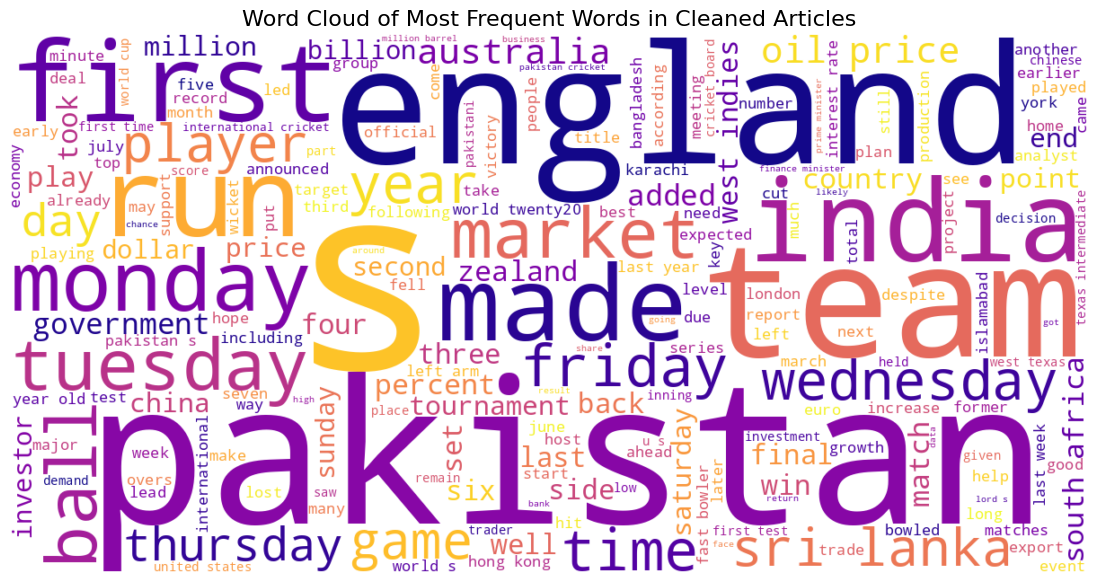

In [63]:

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
# You can add domain-specific stopwords if needed
custom_stopwords.update(["said", "mr", "ms", "will", "new", "also", "us", "one", "two"])

# Combine all cleaned articles into one string
all_text = " ".join(df['cleaned_article'].dropna().tolist())

# Create WordCloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=200,
    stopwords=custom_stopwords,
    colormap='plasma'
).generate(all_text)

# Display
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Cleaned Articles", fontsize=16)
plt.show()


2️⃣ Word Cloud for Specific Location

Top locations: ['pakistan', 'islamabad', 'Unknown', 'london', 'karachi']
Generating word cloud for 'pakistan' (274 articles)


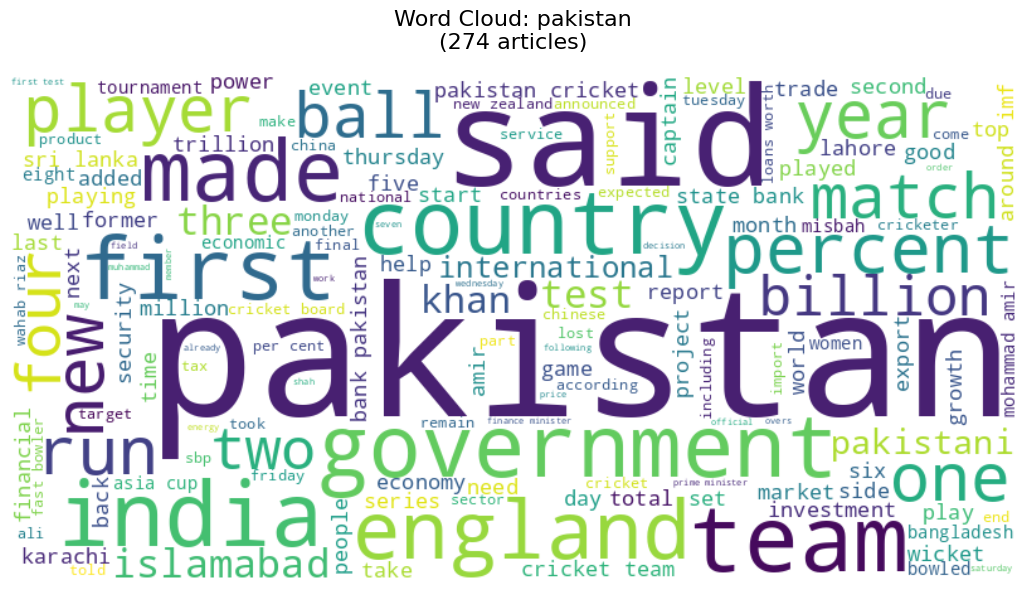

Generating word cloud for 'islamabad' (204 articles)


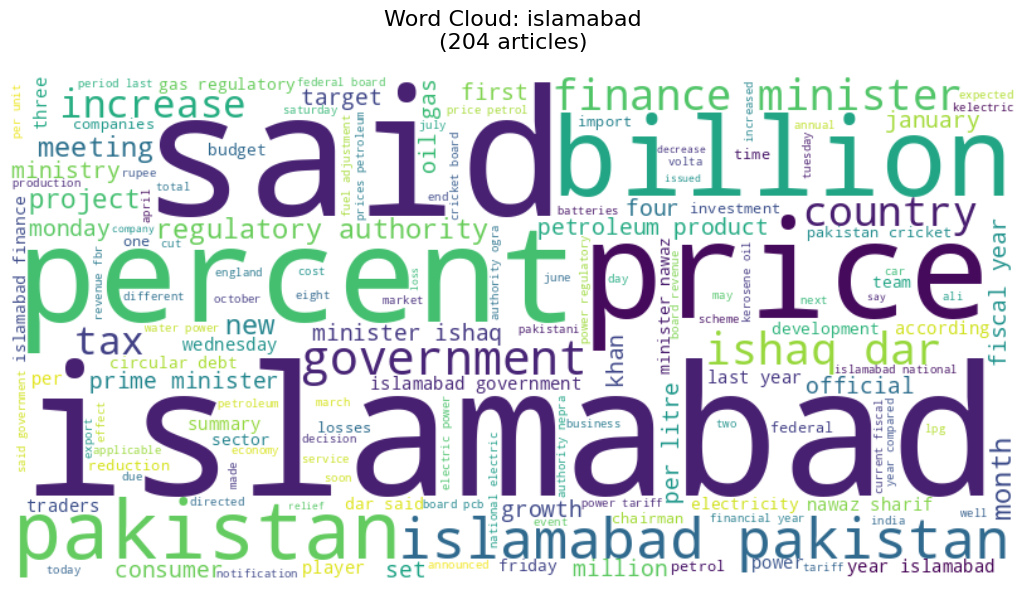

Generating word cloud for 'Unknown' (139 articles)


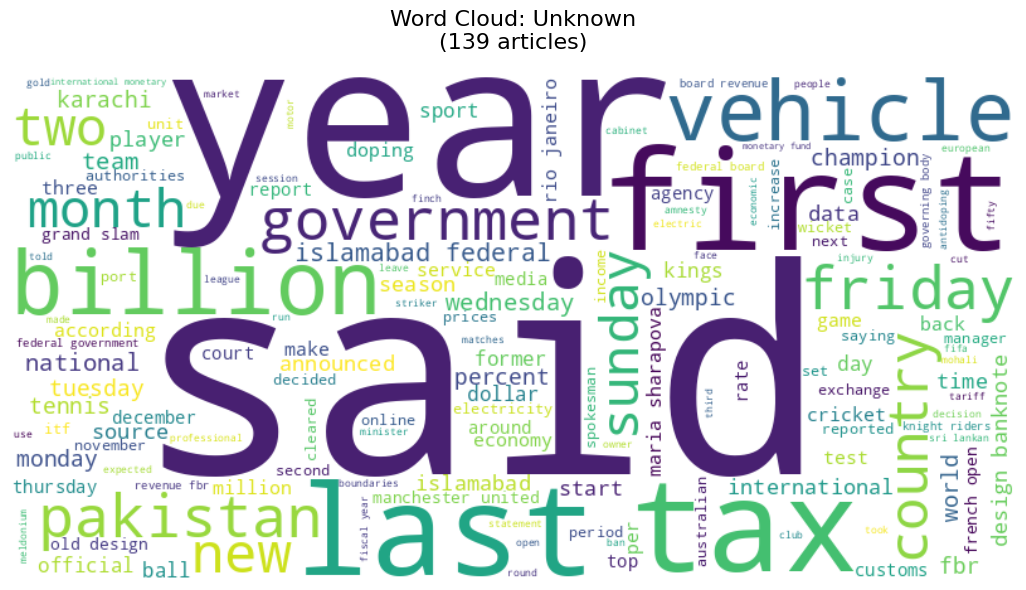

Generating word cloud for 'london' (127 articles)


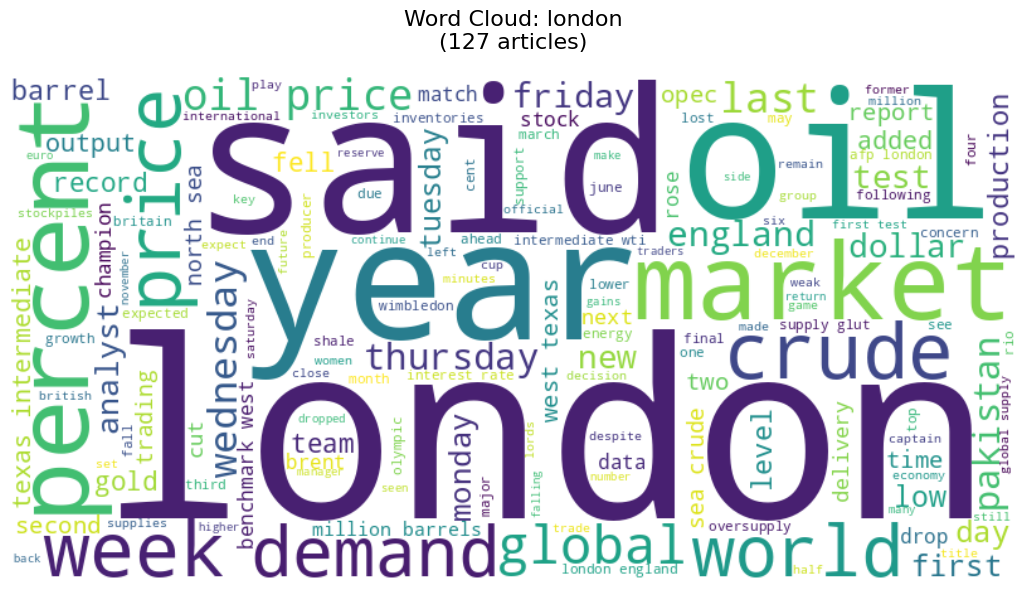

Generating word cloud for 'karachi' (116 articles)


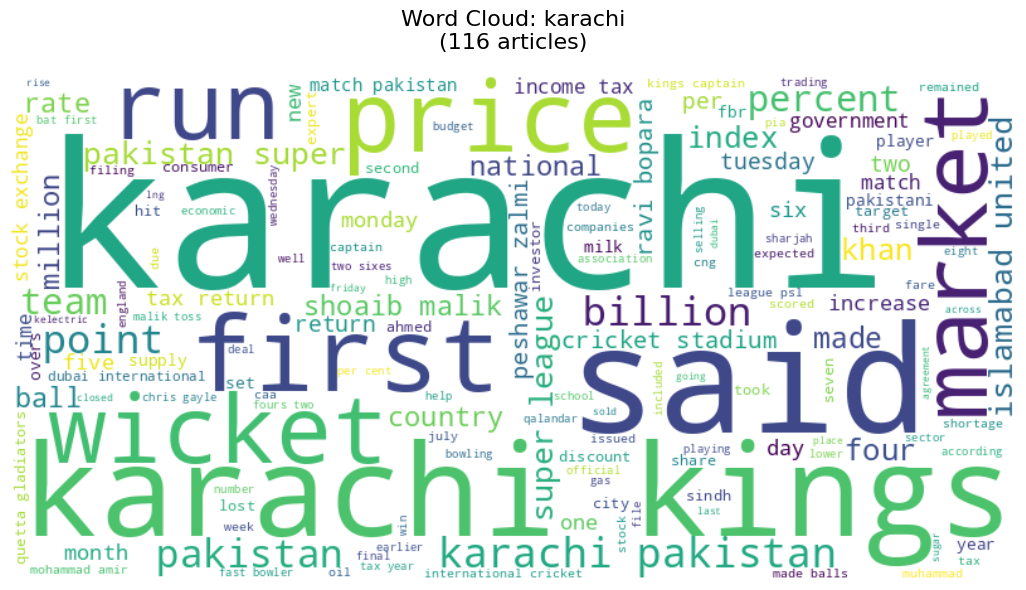

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import pandas as pd

# Filter DataFrame by specific location (e.g., "New York", "London")
def create_location_wordcloud(df, location_name, text_column="cleaned_article", max_words=100):
    """
    Creates word cloud for articles mentioning a specific location.
    """
    # Filter rows where location appears
    location_df = df[df['dominant_location'] == location_name]

    if location_df.empty:
        print(f"No articles found for '{location_name}'")
        return

    print(f"Generating word cloud for '{location_name}' ({len(location_df)} articles)")

    # Combine all text from location articles
    text = ' '.join(location_df[text_column].fillna('').astype(str))

    # Clean text: remove punctuation, lowercase, remove stopwords
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())
    stop_words = set(STOPWORDS)
    text = ' '.join(word for word in text.split() if word not in stop_words and len(word) > 2)

    # Generate word cloud
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=max_words,
        colormap='viridis',  # Color scheme [web:91]
        random_state=42
    ).generate(text)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {location_name}\n({len(location_df)} articles)", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# -----------------------------
# USAGE: Generate for top locations
# -----------------------------
# Get top locations
top_locations = df['dominant_location'].value_counts().head(5).index
print("Top locations:", list(top_locations))

# Create word clouds for each
for location in top_locations:
    create_location_wordcloud(df, location, max_words=150)


3️⃣ Sentiment Distribution Across Locations


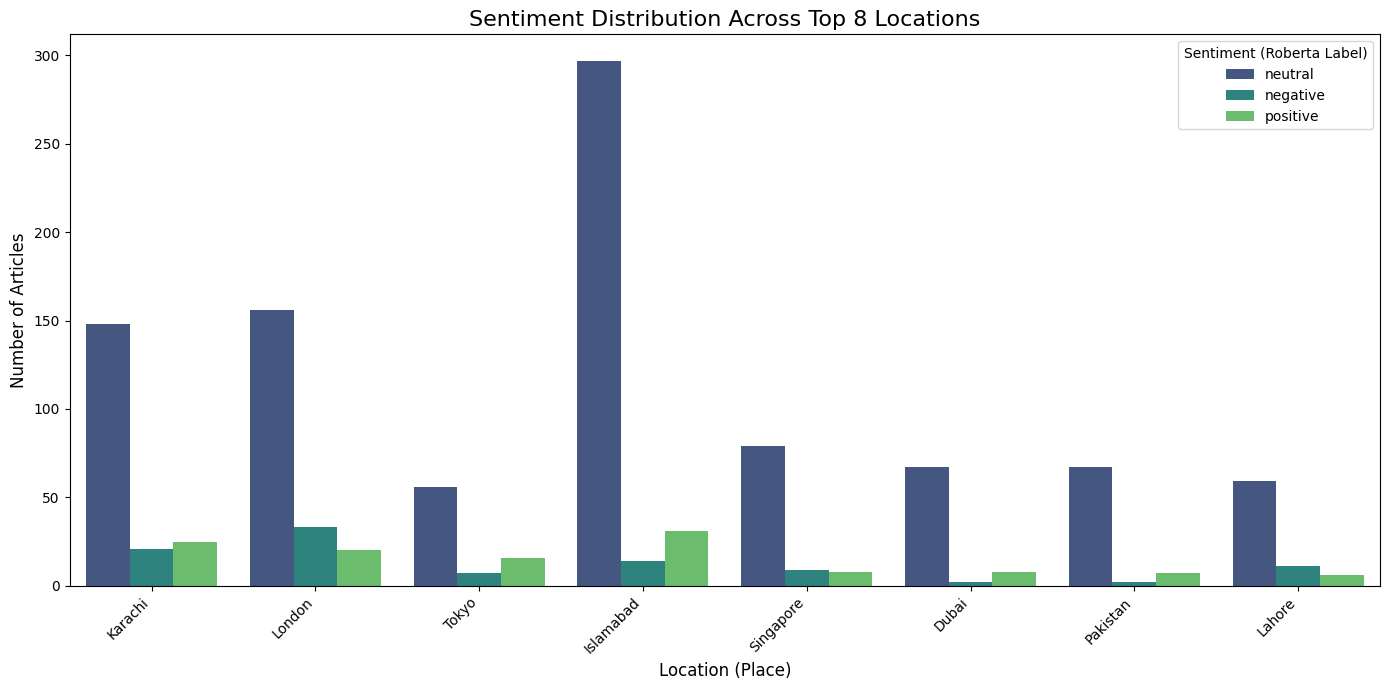

In [67]:
#✅ This shows how positive, neutral, and negative sentiments vary by location.
# Get top 8 places by article count
top_places = df['Place'].value_counts().nlargest(8).index

# Filter dataframe for top 8 places
df_top = df[df['Place'].isin(top_places)]

plt.figure(figsize=(14, 7))
sns.countplot(data=df_top, x='Place', hue='roberta_label', palette='viridis')

plt.title("Sentiment Distribution Across Top 8 Locations", fontsize=16)
plt.xlabel("Location (Place)", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment (Roberta Label)")
plt.tight_layout()
plt.show()



4️⃣ Temporal Sentiment Trends - Count of Sentiment Labels Over Time


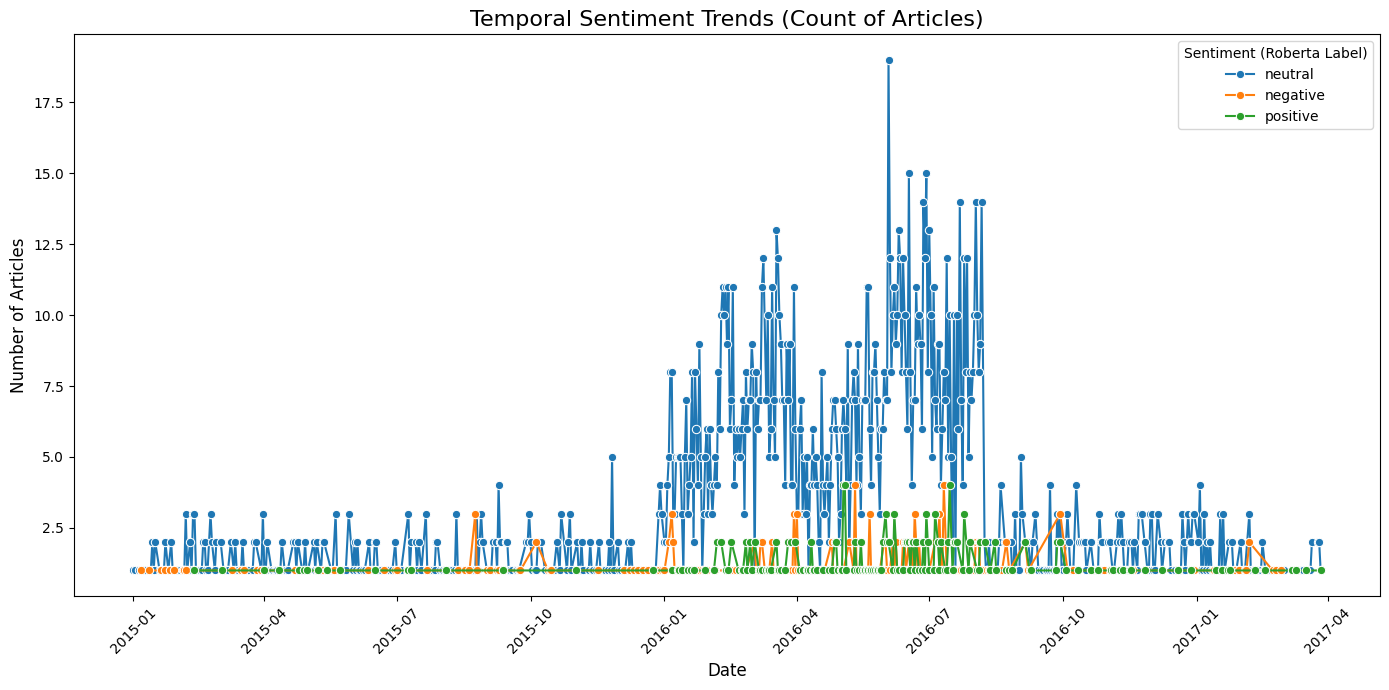

In [68]:
#✅ Good for spotting shifts in sentiment over time.

# Group by Date and sentiment label
sentiment_time = df.groupby(['Date', 'roberta_label']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=sentiment_time, x='Date', y='count', hue='roberta_label', marker='o')

plt.title("Temporal Sentiment Trends (Count of Articles)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment (Roberta Label)")
plt.tight_layout()
plt.show()



5️⃣Average Sentiment Scores Over Time

In [ ]:
'''# Resample by week and calculate average positive/neutral/negative scores
df.set_index('Date', inplace=True)
weekly_sentiment = df[['roberta_pos', 'roberta_neu', 'roberta_neg']].resample('W').mean()

plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sentiment, palette='viridis')
plt.title("Temporal Sentiment Trends (Average Sentiment Scores)", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(labels=['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.show()'''


6️⃣ Top Location

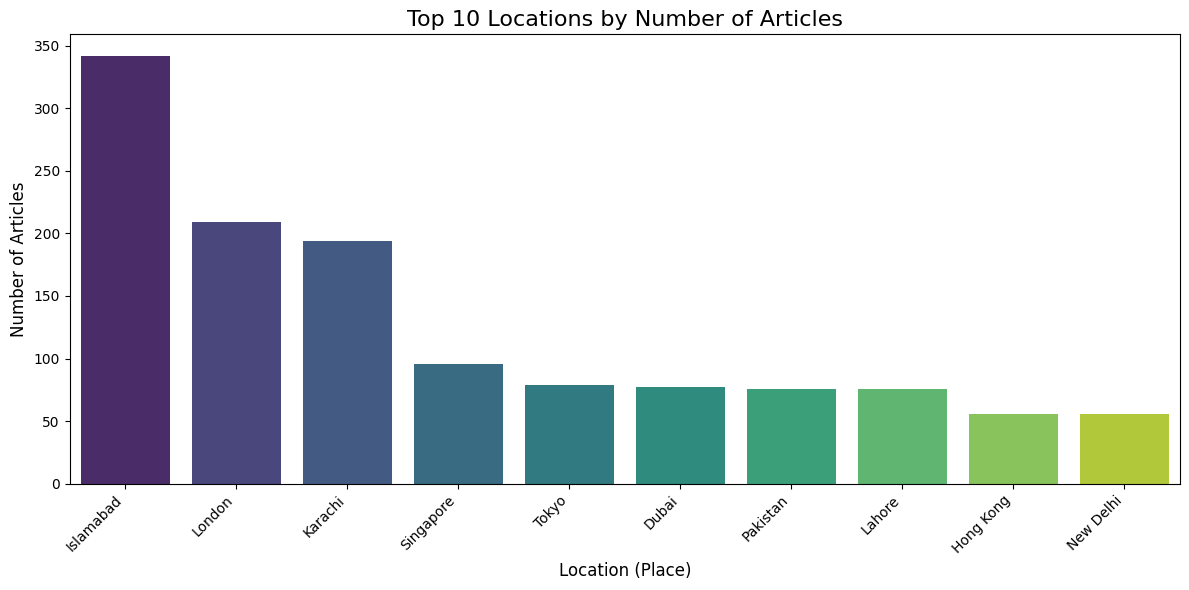

In [69]:


# Get top 10 locations by number of articles
top_10_places = df['Place'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_places.index, y=top_10_places.values, palette='viridis')

plt.title("Top 10 Locations by Number of Articles", fontsize=16)
plt.xlabel("Location (Place)", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



7️⃣ Geospatial Visualization

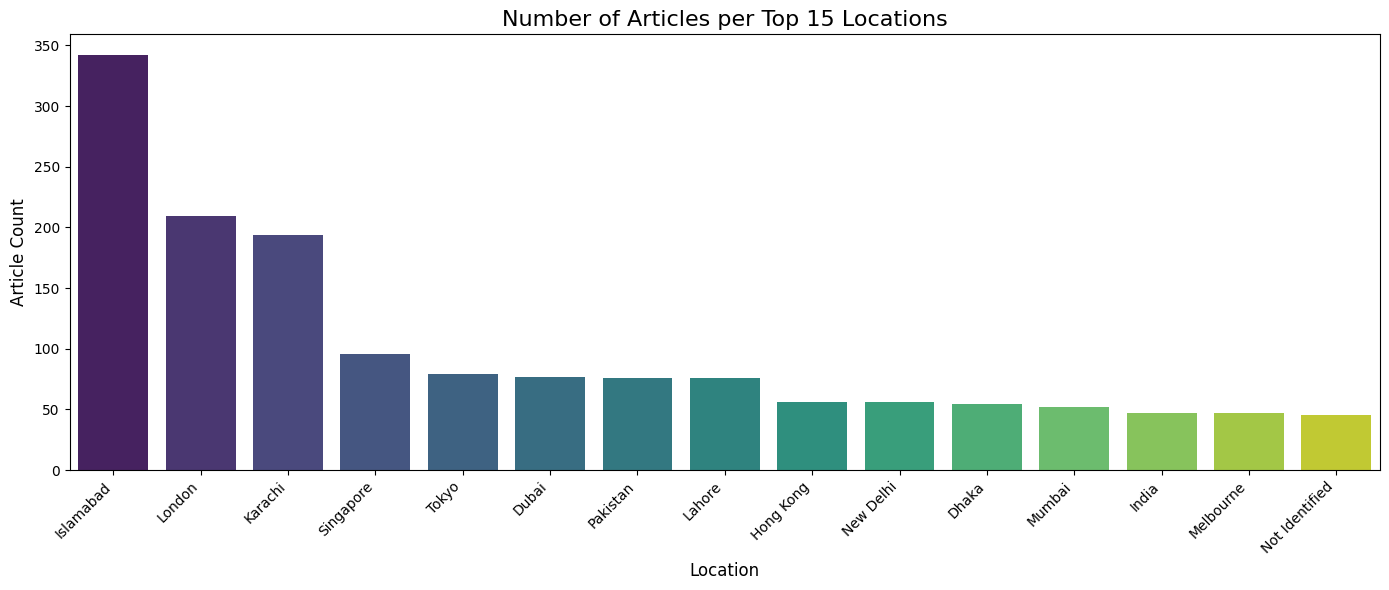

In [70]:

#✅ Shows which locations are most frequently reported.
# Count number of articles per location
# Get location counts
location_counts = df['Place'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

# Keep only top 15
top_15_locations = location_counts.head(15)

plt.figure(figsize=(14,6))
sns.barplot(x='Location', y='Count', data=top_15_locations, palette='viridis')

plt.title("Number of Articles per Top 15 Locations", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Article Count", fontsize=12)
plt.xlabel("Location", fontsize=12)
plt.tight_layout()
plt.show()



8️⃣ Sentiment by Location

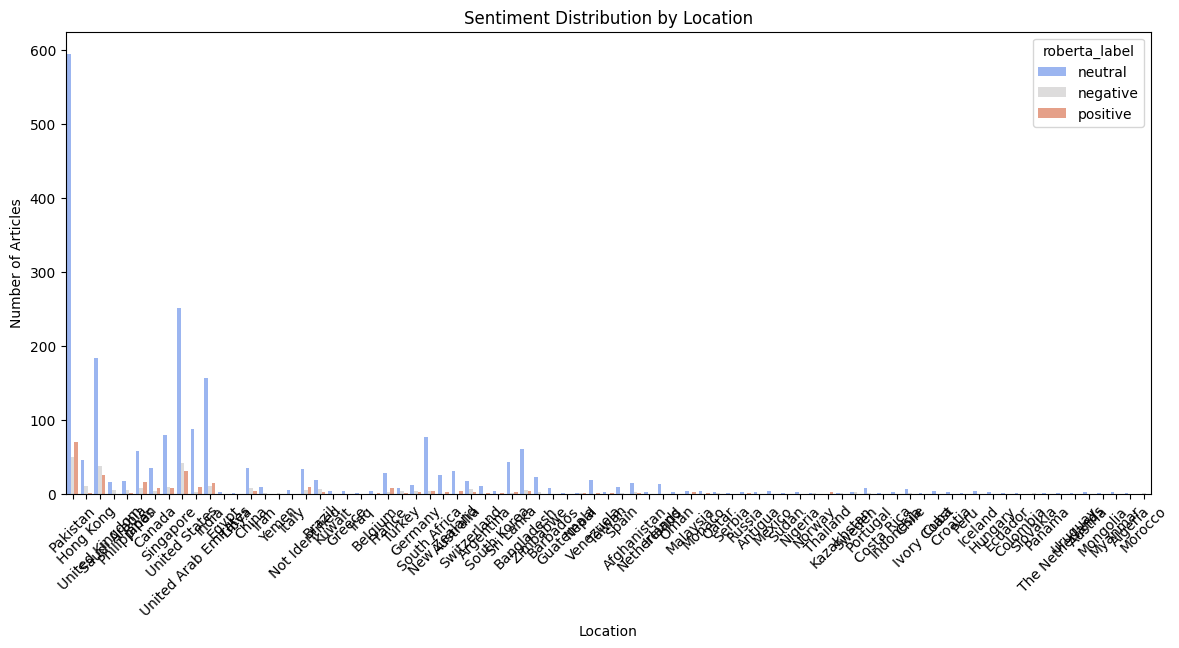

In [71]:
plt.figure(figsize=(14,6))
sns.countplot(x='Country', hue='roberta_label', data=df, palette='coolwarm')
plt.title("Sentiment Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


9️⃣ Pie Chart for News_Category

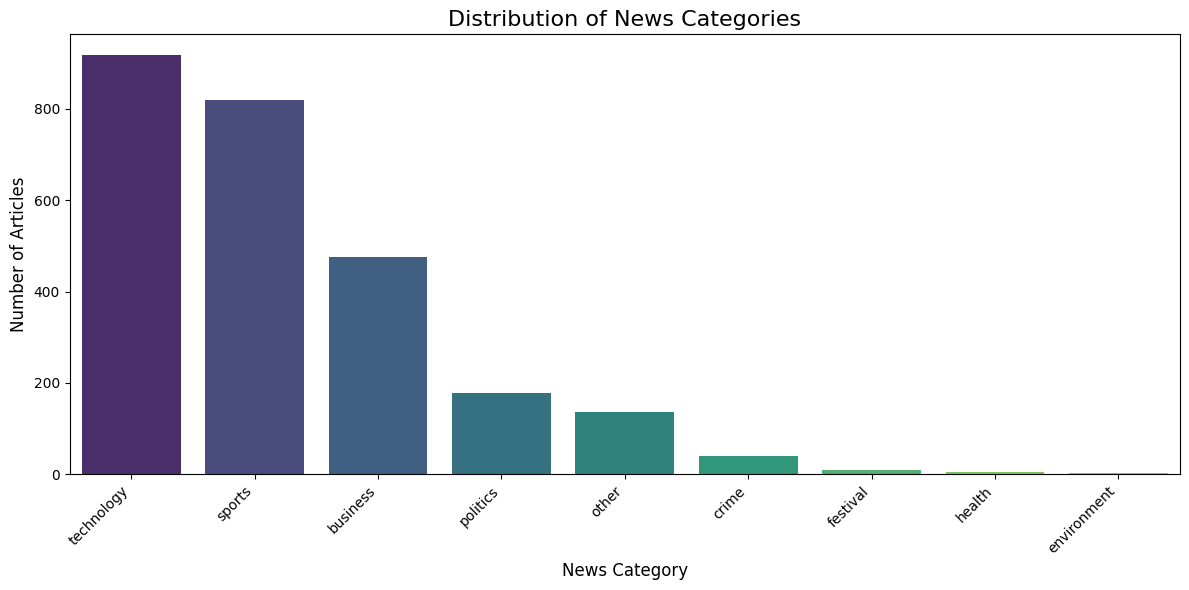

In [72]:

# Count of each category
category_counts = df['News_Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')

plt.title("Distribution of News Categories", fontsize=16)
plt.xlabel("News Category", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
#Preprocessed_features
df=pd.read_csv('Preprocessed_features.csv')


In [ ]:
df.columns

Anomaly vs Normal Distribution

In [ ]:
df.info()

##🤖⚙️MODELING

###1. 🛡️🔍 Linguistic Anomaly Detection Model

Preprocess

In [75]:
print("STEP 0 — Fixing DataFrame Before Model Training...\n")

# 1️⃣ Convert day_of_week → numeric codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
print("Converted: day_of_week → numeric ✔")

# 2️⃣ Fix missing numerical values
numeric_cols = [
    "days_since_last_article",
    "avg_neg", "avg_neu", "avg_pos",
    "avg_days_between", "common_topic"
]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Filled missing numeric values ✔")

# 3️⃣ Convert embeddings from lists → numpy arrays
import numpy as np

df["combined_embed_vec"] = df["combined_embedding"].apply(lambda x: np.array(x))
print("Converted embeddings → numpy arrays ✔")

# 4️⃣ Confirm numeric types now safe
print("\nData types after fixing:")
print(df.dtypes)


STEP 0 — Fixing DataFrame Before Model Training...

Converted: day_of_week → numeric ✔
Filled missing numeric values ✔
Converted embeddings → numpy arrays ✔

Data types after fixing:
Article                     object
Date                        object
Heading                     object
NewsType                    object
raw_article                 object
raw_heading                 object
cleaned_article             object
cleaned_heading             object
explicit_locations          object
implicit_locations          object
all_locations               object
dominant_location           object
Place                       object
Country                     object
roberta_sentiment           object
roberta_label               object
roberta_neg                float64
roberta_neu                float64
roberta_pos                float64
topic                        int64
topic_prob                 float64
year                         int64
month                        int64
day         

In [76]:
# Columns to include (numeric only)
numeric_features = [
    'roberta_neg', 'roberta_neu', 'roberta_pos',
    'topic_prob', 'year', 'month', 'day', 'day_of_week',
    'week_of_year', 'quarter', 'days_since_last_article',
    'cumulative_articles', 'avg_neg', 'avg_neu', 'avg_pos',
    'avg_days_between', 'common_topic'
]

# Add combined embeddings
numeric_features += ['combined_embed_vec']

# Convert embeddings from list/array object to actual numeric array

def convert_embedding(x):
    # Ensure x is a numpy array
    if isinstance(x, np.ndarray):
        return x
    elif isinstance(x, list):
        return np.array(x)
    elif isinstance(x, str):
        try:
            return np.fromstring(x.replace('\n','').replace('[','').replace(']',''), sep=' ')
        except:
            return np.zeros(768)  # fallback if parsing fails
    else:
        return np.zeros(768)

df['combined_embed_vec'] = df['combined_embedding'].apply(convert_embedding)

# Stack embeddings with other numeric columns
X_base = df[numeric_features[:-1]].values  # all numeric features except embeddings
X_emb = np.stack(df['combined_embed_vec'].values)  # embeddings as 2D array

# Final numeric matrix
X = np.hstack([X_base, X_emb])
print(f"Final feature matrix shape: {X.shape}")


Final feature matrix shape: (2585, 785)


In [77]:


print("STEP 1 — Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaling completed ✔")


STEP 1 — Scaling features...
Scaling completed ✔


Model Traning

In [78]:


print("STEP 2 — Training Isolation Forest...")
iso_model = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
iso_model.fit(X_scaled)
df['iso_anomaly'] = iso_model.predict(X_scaled)
df['iso_anomaly'] = df['iso_anomaly'].map({1:0, -1:1})
print(f"Isolation Forest detected {df['iso_anomaly'].sum()} anomalies ✔")


STEP 2 — Training Isolation Forest...
Isolation Forest detected 130 anomalies ✔


One-Class SVM

In [79]:


print("STEP 3 — Training One-Class SVM...")
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
svm_model.fit(X_scaled)
df['svm_anomaly'] = svm_model.predict(X_scaled)
df['svm_anomaly'] = df['svm_anomaly'].map({1:0, -1:1})
print(f"One-Class SVM detected {df['svm_anomaly'].sum()} anomalies ✔")


STEP 3 — Training One-Class SVM...
One-Class SVM detected 194 anomalies ✔


Variational Autoencoder (VAE)

In [80]:


print("STEP 4 — Training VAE...")

# Convert to torch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=32):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)
        self.fc_dec1 = nn.Linear(latent_dim, 128)
        self.fc_dec2 = nn.Linear(128, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc_dec1(z))
        return self.fc_dec2(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

vae = VAE(input_dim=X_scaled.shape[1], latent_dim=32)
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
criterion = nn.MSELoss(reduction='mean')

dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

epochs = 20
for epoch in range(epochs):
    vae.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        x_batch = batch[0]
        x_recon, mu, logvar = vae(x_batch)
        loss = criterion(x_recon, x_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(loader):.6f}")

vae.eval()
with torch.no_grad():
    X_recon, _, _ = vae(X_tensor)
    recon_error = ((X_tensor - X_recon)**2).mean(dim=1).numpy()

threshold = recon_error.mean() + 2*recon_error.std()
df['vae_anomaly'] = (recon_error > threshold).astype(int)
print(f"VAE detected {df['vae_anomaly'].sum()} anomalies ✔")


STEP 4 — Training VAE...
Epoch 1/20, Loss: 0.960809
Epoch 2/20, Loss: 0.812099
Epoch 3/20, Loss: 0.738332
Epoch 4/20, Loss: 0.689279
Epoch 5/20, Loss: 0.654147
Epoch 6/20, Loss: 0.629141
Epoch 7/20, Loss: 0.610695
Epoch 8/20, Loss: 0.596132
Epoch 9/20, Loss: 0.584358
Epoch 10/20, Loss: 0.574642
Epoch 11/20, Loss: 0.566386
Epoch 12/20, Loss: 0.559518
Epoch 13/20, Loss: 0.554755
Epoch 14/20, Loss: 0.549241
Epoch 15/20, Loss: 0.544508
Epoch 16/20, Loss: 0.540741
Epoch 17/20, Loss: 0.537314
Epoch 18/20, Loss: 0.533932
Epoch 19/20, Loss: 0.530893
Epoch 20/20, Loss: 0.528075
VAE detected 62 anomalies ✔


Deep SVDD — Anomaly Detection (PyTorch)

In [81]:
class DeepSVDDNet(nn.Module):
    def __init__(self, input_dim, latent_dim=32):
        super(DeepSVDDNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )

    def forward(self, x):
        return self.encoder(x)


In [82]:
#Initialize Center of Hypersphere
def initialize_center_c(model, dataloader, device='cpu'):
    model.eval()
    n_samples = 0
    c = torch.zeros(model.encoder[-1].out_features, device=device)

    with torch.no_grad():
        for batch in dataloader:
            x = batch[0].to(device)
            outputs = model(x)
            n_samples += x.shape[0]
            c += outputs.sum(dim=0)

    c /= n_samples

    # Avoid zero values (as in paper)
    c[c == 0] = 1e-6
    return c


Train Deep SVDD

In [83]:
def train_deep_svdd(X_train, latent_dim=32, epochs=30, lr=1e-3, batch_size=64, device='cpu'):

    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    dataset = TensorDataset(X_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model = DeepSVDDNet(input_dim=X_train.shape[1], latent_dim=latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 1️⃣ Initialize the center c
    c = initialize_center_c(model, loader, device)

    # Training
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in loader:
            x = batch[0].to(device)

            optimizer.zero_grad()
            z = model(x)

            # Deep SVDD loss: minimize distance from center
            dist = torch.sum((z - c)**2, dim=1)
            loss = torch.mean(dist)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(loader):.6f}")

    return model, c


In [84]:
#Compute Anomaly Scores

def deep_svdd_anomaly_score(model, c, X, device='cpu'):
    model.eval()
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    with torch.no_grad():
        z = model(X_tensor)
        dist = torch.sum((z - c)**2, dim=1)
    return dist.cpu().numpy()


In [85]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Training Deep SVDD...")
model_svdd, center_c = train_deep_svdd(X_scaled, latent_dim=32, epochs=30, device=device)

# anomaly score
svdd_scores = deep_svdd_anomaly_score(model_svdd, center_c, X_scaled, device=device)

# Threshold using mean + 2*std
threshold = svdd_scores.mean() + 2 * svdd_scores.std()

df["deep_svdd_score"] = svdd_scores
df["deep_svdd_anomaly"] = (df["deep_svdd_score"] > threshold).astype(int)

print(f"Deep SVDD detected {df['deep_svdd_anomaly'].sum()} anomalies ✔")


Training Deep SVDD...
Epoch 1/30, Loss: 0.514168
Epoch 2/30, Loss: 0.115551
Epoch 3/30, Loss: 0.050456
Epoch 4/30, Loss: 0.029500
Epoch 5/30, Loss: 0.019485
Epoch 6/30, Loss: 0.013525
Epoch 7/30, Loss: 0.009917
Epoch 8/30, Loss: 0.007548
Epoch 9/30, Loss: 0.005949
Epoch 10/30, Loss: 0.004757
Epoch 11/30, Loss: 0.003955
Epoch 12/30, Loss: 0.003401
Epoch 13/30, Loss: 0.003074
Epoch 14/30, Loss: 0.002795
Epoch 15/30, Loss: 0.002695
Epoch 16/30, Loss: 0.002616
Epoch 17/30, Loss: 0.002588
Epoch 18/30, Loss: 0.002580
Epoch 19/30, Loss: 0.002743
Epoch 20/30, Loss: 0.002429
Epoch 21/30, Loss: 0.002017
Epoch 22/30, Loss: 0.001734
Epoch 23/30, Loss: 0.001278
Epoch 24/30, Loss: 0.001008
Epoch 25/30, Loss: 0.000807
Epoch 26/30, Loss: 0.000674
Epoch 27/30, Loss: 0.000592
Epoch 28/30, Loss: 0.000550
Epoch 29/30, Loss: 0.000483
Epoch 30/30, Loss: 0.000411
Deep SVDD detected 126 anomalies ✔


In [86]:
# Count anomalies detected by each model
iso_count = df['iso_anomaly'].sum()
svm_count = df['svm_anomaly'].sum()
vae_count = df['vae_anomaly'].sum()
svdd_count = df['deep_svdd_anomaly'].sum()

print("Number of anomalies detected by each model:")
print(f"Isolation Forest: {iso_count}")
print(f"One-Class SVM: {svm_count}")
print(f"VAE: {vae_count}")
print(f"Deep SVDD: {svdd_count}")

# Create consensus anomaly column
# 1 if at least two models flag as anomaly (now includes 4 models)
df['consensus_anomaly'] = (
    df[['iso_anomaly', 'svm_anomaly', 'vae_anomaly', 'deep_svdd_anomaly']].sum(axis=1) >= 2
).astype(int)

print(f"Consensus anomalies (at least 2 models agree): {df['consensus_anomaly'].sum()}")

# Optional: show sample preview
df[['iso_anomaly', 'svm_anomaly', 'vae_anomaly', 'deep_svdd_anomaly', 'consensus_anomaly']].head(10)


Number of anomalies detected by each model:
Isolation Forest: 130
One-Class SVM: 194
VAE: 62
Deep SVDD: 126
Consensus anomalies (at least 2 models agree): 84


iso_anomaly  svm_anomaly  vae_anomaly  deep_svdd_anomaly  consensus_anomaly
0            0            0            0                  0                  0
1            0            0            0                  0                  0
2            0            0            0                  0                  0
3            0            0            0                  0                  0
4            0            0            0                  0                  0
5            0            0            0                  0                  0
6            0            0            0                  0                  0
7            0            0            0                  0                  0
8            1            1            0                  0                  1
9            0            0            0                  0                  0

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

models = ['iso_anomaly', 'svm_anomaly', 'vae_anomaly']

# --- If you have ground-truth labels ---
if 'true_anomaly' in df.columns:
    for model in models:
        print(f"\n--- Evaluation for {model} ---")
        print("Confusion Matrix:")
        print(confusion_matrix(df['true_anomaly'], df[model]))
        print("\nClassification Report:")
        print(classification_report(df['true_anomaly'], df[model]))

        try:
            auc = roc_auc_score(df['true_anomaly'], df[model])
            print(f"ROC-AUC: {auc:.4f}")
        except:
            print("ROC-AUC not available (single class present).")

# --- Unsupervised evaluation (no ground truth) ---
else:
    print("\n--- Unsupervised Evaluation ---")
    for model in models:
        n_anomalies = df[model].sum()
        total = len(df)
        print(f"{model}: Detected {n_anomalies} anomalies out of {total} ({n_anomalies/total:.2%})")

    # Overlaps between models
    overlaps = {
        'IF & SVM': ((df['iso_anomaly']==1) & (df['svm_anomaly']==1)).sum(),
        'IF & VAE': ((df['iso_anomaly']==1) & (df['vae_anomaly']==1)).sum(),
        'SVM & VAE': ((df['svm_anomaly']==1) & (df['vae_anomaly']==1)).sum(),
        'IF & SVM & VAE': ((df['iso_anomaly']==1) & (df['svm_anomaly']==1) & (df['vae_anomaly']==1)).sum()
    }
    print("\nOverlaps between models:")
    for k, v in overlaps.items():
        print(f"{k}: {v} anomalies")

    # Bar chart of anomalies per model
    plt.figure(figsize=(8,5))
    counts = [df[m].sum() for m in models]
    plt.bar(models, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.ylabel("Number of Anomalies")
    plt.title("Anomalies Detected by Each Model")
    plt.show()



--- Evaluation for iso_anomaly ---
Confusion Matrix:
[[2455  130]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2585
           1       0.00      0.00      0.00         0

    accuracy                           0.95      2585
   macro avg       0.50      0.47      0.49      2585
weighted avg       1.00      0.95      0.97      2585

ROC-AUC: nan

--- Evaluation for svm_anomaly ---
Confusion Matrix:
[[2391  194]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2585
           1       0.00      0.00      0.00         0

    accuracy                           0.92      2585
   macro avg       0.50      0.46      0.48      2585
weighted avg       1.00      0.92      0.96      2585

ROC-AUC: nan

--- Evaluation for vae_anomaly ---
Confusion Matrix:
[[2523   62]
 [   0    0]]

Classification Report:
     


 UNSUPERVISED METRICS REPORT 

🔹 Anomalies detected:
iso_anomaly: 130 anomalies
svm_anomaly: 194 anomalies
vae_anomaly: 62 anomalies
deep_svdd_anomaly: 126 anomalies

🔹 Model Overlap (Jaccard Similarity):
iso_anomaly vs svm_anomaly → Jaccard: 0.161
iso_anomaly vs vae_anomaly → Jaccard: 0.116
iso_anomaly vs deep_svdd_anomaly → Jaccard: 0.024
svm_anomaly vs vae_anomaly → Jaccard: 0.148
svm_anomaly vs deep_svdd_anomaly → Jaccard: 0.029
vae_anomaly vs deep_svdd_anomaly → Jaccard: 0.011


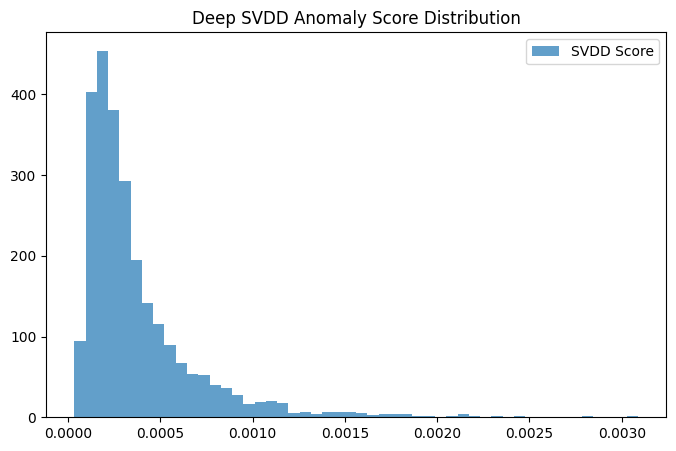


🔹 Pseudo-label anomalies (2+ model agreement): 84

 SUPERVISED METRICS (Pseudo Labels) 

iso_anomaly → ROC-AUC: 0.819
svm_anomaly → ROC-AUC: 0.904
vae_anomaly → ROC-AUC: 0.740
deep_svdd_anomaly → ROC-AUC: 0.561
iso_anomaly → PR-AUC: 0.554
svm_anomaly → PR-AUC: 0.616
vae_anomaly → PR-AUC: 0.583
deep_svdd_anomaly → PR-AUC: 0.152

🔹 F1-scores:
iso_anomaly → F1: 0.523
svm_anomaly → F1: 0.518
vae_anomaly → F1: 0.562
deep_svdd_anomaly → F1: 0.133

 RANKING METRICS (Recall@K) 

Recall@50 for anomaly_score: 0.024
Recall@50 for deep_svdd_score: 0.060


In [88]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
import matplotlib.pyplot as plt

models = ['iso_anomaly', 'svm_anomaly', 'vae_anomaly', 'deep_svdd_anomaly']
scores = ['anomaly_score', 'deep_svdd_score']  # if available


print("\n==============================")
print(" UNSUPERVISED METRICS REPORT ")
print("==============================\n")

# ------------------------------
# 1. MODEL ANOMALY COUNTS
# ------------------------------
print("🔹 Anomalies detected:")
for model in models:
    print(f"{model}: {df[model].sum()} anomalies")


# ------------------------------
# 2. Overlap & agreement
# ------------------------------
print("\n🔹 Model Overlap (Jaccard Similarity):")

def jaccard(a, b):
    a1 = df[a] == 1
    b1 = df[b] == 1
    return (a1 & b1).sum() / (a1 | b1).sum()

for i in range(len(models)):
    for j in range(i+1, len(models)):
        score = jaccard(models[i], models[j])
        print(f"{models[i]} vs {models[j]} → Jaccard: {score:.3f}")


# ------------------------------
# 3. Score Distribution Plot
# ------------------------------
if 'deep_svdd_score' in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df['deep_svdd_score'], bins=50, alpha=0.7, label="SVDD Score")
    plt.title("Deep SVDD Anomaly Score Distribution")
    plt.legend()
    plt.show()


# -----------------------------------
# 4. PSEUDO LABELS (Consensus Labels)
# -----------------------------------
df['pseudo_label'] = (df[models].sum(axis=1) >= 2).astype(int)
print(f"\n🔹 Pseudo-label anomalies (2+ model agreement): {df['pseudo_label'].sum()}")


# -----------------------------------
# 5. ROC-AUC / PR-AUC (with Pseudo-labels)
# -----------------------------------
print("\n==============================")
print(" SUPERVISED METRICS (Pseudo Labels) ")
print("==============================\n")

for model in models:
    try:
        auc_score = roc_auc_score(df['pseudo_label'], df[model])
        print(f"{model} → ROC-AUC: {auc_score:.3f}")
    except:
        print(f"{model} → ROC-AUC: ❌ cannot compute")


# PR Curve + AUC
for model in models:
    precision, recall, _ = precision_recall_curve(df['pseudo_label'], df[model])
    pr_auc = auc(recall, precision)
    print(f"{model} → PR-AUC: {pr_auc:.3f}")


# -----------------------------------
# 6. F1-score with pseudo-labels
# -----------------------------------
print("\n🔹 F1-scores:")
for model in models:
    f1_val = f1_score(df['pseudo_label'], df[model])
    print(f"{model} → F1: {f1_val:.3f}")


# -----------------------------------
# 7. Recall@K (Ranking Metric)
# -----------------------------------
print("\n==============================")
print(" RANKING METRICS (Recall@K) ")
print("==============================\n")

K = 50  # Top 50 anomalies

for score_col in scores:
    if score_col in df.columns:
        df_sorted = df.sort_values(score_col, ascending=False)
        top_k = df_sorted.head(K)
        recall_k = top_k['pseudo_label'].sum() / df['pseudo_label'].sum()
        print(f"Recall@{K} for {score_col}: {recall_k:.3f}")


In [ ]:
df.columns

In [ ]:


# 1️⃣ Anomalies by Dominant Location
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='dominant_location', hue='consensus_anomaly', palette=['green','red'])
plt.xticks(rotation=90)
plt.title("Anomalies vs Normal by Dominant Location")
plt.xlabel("Location")
plt.ylabel("Number of Articles")
plt.legend(title='Anomaly', labels=['Normal','Anomaly'])
plt.tight_layout()
plt.show()

# 2️⃣ Anomalies by NewsType
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='NewsType', hue='consensus_anomaly', palette=['green','red'])
plt.title("Anomalies vs Normal by NewsType")
plt.xlabel("NewsType")
plt.ylabel("Number of Articles")
plt.legend(title='Anomaly', labels=['Normal','Anomaly'])
plt.tight_layout()
plt.show()


###2. 🤖📡 Source Discrepancy Detection


In [89]:
#filter rare location
from collections import Counter

# Count samples per location
location_counts = Counter(df['dominant_location'])
valid_locations = [loc for loc, count in location_counts.items() if count >= 2]

# Filter dataframe
df_filtered = df[df['dominant_location'].isin(valid_locations)].copy()
print(f"Filtered dataset: {df_filtered.shape[0]} rows, removed rare locations.")

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['dominant_location'])
print(f"Number of classes after filtering: {len(le.classes_)}")


Filtered dataset: 2457 rows, removed rare locations.
Number of classes after filtering: 170


In [90]:
#Build feature matrix

# Convert embedding list/array columns to proper NumPy arrays
X_embed = np.vstack(df_filtered['combined_embed_vec'].values)  # shape: (n_samples, embedding_dim)

# Sentiment & topic features
X_extra = df_filtered[['roberta_neg', 'roberta_neu', 'roberta_pos', 'topic_prob']].values

# Combine
X_final = np.hstack([X_embed, X_extra])
print(f"Feature matrix shape: {X_final.shape}")


Feature matrix shape: (2457, 772)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (1965, 772), Test shape: (492, 772)


Logistic Regression

In [92]:


print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Training Logistic Regression...
Logistic Regression Accuracy: 0.4878048780487805


XGBoost

In [93]:

print("Training XGBoost...")
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Training XGBoost...
XGBoost Accuracy: 0.4146341463414634


Neural Network (MLPClassifier)

In [94]:

print("Training MLPClassifier...")
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
print("MLPClassifier Accuracy:", accuracy_score(y_test, y_pred_mlp))


Training MLPClassifier...
MLPClassifier Accuracy: 0.45934959349593496



###3. ⏱️🔍 Temporal Anomaly Detection


In [ ]:
df.columns

In [95]:

#Step 0 — Prepare temporal data
# Make sure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])


# Sort by Date
df = df.sort_values('Date')

# Select only relevant columns
temp_df = df[['Date', 'dominant_location', 'topic_prob', 'roberta_neg', 'roberta_neu', 'roberta_pos']].copy()


In [96]:
#Aggregate per location & time unit
# Weekly aggregation per location
agg_df = temp_df.groupby(['dominant_location', pd.Grouper(key='Date', freq='W')]).agg({
    'topic_prob': 'mean',
    'roberta_neg': 'mean',
    'roberta_neu': 'mean',
    'roberta_pos': 'mean'
}).reset_index()

print("Aggregated time-series shape:", agg_df.shape)


Aggregated time-series shape: (1475, 6)


In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler


# -------------------------------
# 1️⃣ Rolling Z-score per location
# -------------------------------
window = 7
df['zscore_anomaly'] = df.groupby('dominant_location')['topic_prob'] \
    .transform(lambda x: (x - x.rolling(window, min_periods=1).mean()) /
                         (x.rolling(window, min_periods=1).std() + 1e-6))
print("Z-score temporal anomalies calculated ✔")

# -------------------------------
# 2️⃣ ARIMA-based anomaly score
# -------------------------------
# Initialize with NaNs
df['arima_anomaly_score'] = np.nan

for loc, group in df.groupby('dominant_location'):
    if pd.isna(loc):
        continue
    group = group.sort_values('Date')
    y = group['topic_prob'].values
    try:
        model = ARIMA(y, order=(1,0,0))
        model_fit = model.fit()
        forecast = model_fit.predict(start=0, end=len(y)-1)
        score = np.abs(y - forecast)
    except:
        score = np.zeros(len(y))
    # Assign scores back to the correct rows
    df.loc[group.index, 'arima_anomaly_score'] = score

print("ARIMA temporal anomalies calculated ✔")

# -------------------------------
# 3️⃣ Normalize scores 0-1
# -------------------------------
scaler = MinMaxScaler()
df[['zscore_anomaly', 'arima_anomaly_score']] = scaler.fit_transform(
    df[['zscore_anomaly', 'arima_anomaly_score']].fillna(0)
)
print("Normalized temporal anomaly scores ✔")

# -------------------------------
# Save dataset
# -------------------------------
df.to_pickle("processed_temporal_anomalies.pkl")
print("Processed dataset saved ✔")


Z-score temporal anomalies calculated ✔
ARIMA temporal anomalies calculated ✔
Normalized temporal anomaly scores ✔
Processed dataset saved ✔


In [98]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of anomaly score columns you have
models = ['zscore_anomaly', 'arima_anomaly_score']

# Normalize scores 0-1 if needed
scaler = MinMaxScaler()
df[models] = scaler.fit_transform(df[models].fillna(0))

# Check if true anomalies exist
if 'true_anomaly' in df.columns:
    print("=== Supervised Evaluation ===")
    for m in models:
        # ROC-AUC
        roc_auc = roc_auc_score(df['true_anomaly'], df[m])

        # PR-AUC
        precision, recall, _ = precision_recall_curve(df['true_anomaly'], df[m])
        pr_auc = auc(recall, precision)

        # F1-score at top 5% anomalies
        threshold = df[m].quantile(0.95)
        preds = (df[m] >= threshold).astype(int)
        f1 = f1_score(df['true_anomaly'], preds)

        print(f"\nModel: {m}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}")
        print(f"F1-score (top 5% threshold): {f1:.4f}")

else:
    print("=== Unsupervised Evaluation ===")
    for m in models:
        # Report top anomalies
        top_count = (df[m] >= df[m].quantile(0.95)).sum()
        print(f"{m}: {top_count} anomalies in top 5% of scores ({top_count/len(df):.2%})")


=== Supervised Evaluation ===

Model: zscore_anomaly
ROC-AUC: nan
PR-AUC: 0.5000
F1-score (top 5% threshold): 0.0000

Model: arima_anomaly_score
ROC-AUC: nan
PR-AUC: 0.5000
F1-score (top 5% threshold): 0.0000


Saving the models

In [99]:
import pickle

# Save Isolation Forest model
with open("isolation_forest_model.pkl", "wb") as f:
    pickle.dump(iso_model, f)

# Save One-Class SVM model
with open("one_class_svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save VAE model (PyTorch) - recommended method
torch.save(vae.state_dict(), "vae_model.pth")

# Save Logistic Regression model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# Save XGBoost model
with open("xgb_location_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save MLPClassifier model
with open("NN_location_model.pkl", "wb") as f:
    pickle.dump(mlp_model, f)


In [100]:
torch.save(model_svdd.state_dict(), "deep_svdd.pth")
np.save("center_c.npy", center_c.cpu().numpy())


In [101]:
# Save model
with open('arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(model_fit, pkl_file)

print("ARIMA model saved successfully!")

ARIMA model saved successfully!


In [ ]:
#Temporal Anomaly Detection
df.shape


In [ ]:
df.columns


In [102]:
df.to_csv("Anomaly_Detection.csv", index=False)
print("Processed dataset saved  ✔")


Processed dataset saved  ✔


In [ ]:
df.sample(8)

In [103]:
anomalies = df[df["iso_anomaly"] == 1]
print(anomalies)


                                                Article       Date  \
8     KARACHI: Wholesale market rates for sugar drop... 2015-01-13   
29    NEW YORK: US authorities are investigating the... 2015-02-02   
39    LONDON: British bank HSBC Holdings Plc admitte... 2015-02-09   
87    KARACHI: The State Bank of Pakistan on Saturda... 2015-03-21   
131   KARACHI: Maxus has been appointed as the Digit... 2015-04-30   
...                                                 ...        ...   
2570  MOSCOW: Russia and Turkey signed a memorandum ... 2017-03-10   
2574  BEIJING: The Xinjiang Uygur autonomous region ... 2017-03-17   
2575  BEIJING: Beijing's last large coal-fired power... 2017-03-19   
2579  BEIJING: A Chinese rail company has won a cont... 2017-03-25   
2582  WASHINGTON: Uber has grounded its fleet of sel... 2017-03-26   

                                                Heading  NewsType  \
8                 sugar prices drop to rs 49.80 in sind  business   
29                   